# Vasaskipet - Hvilke påvirkninger på skipet kunne resultere i kantringen?


##### Kandidater: 10172, 10042 og 10108
28. februar - 14. mars

### Sammendrag 


Vi lagde en modell av et skip for å simulere og studere utviklingen når den settes til sjøs. Når skipet står i ro i sjøen regnet vi ut sektorvinkelen ved bruk av metasenteret til skipet. Ved likevekt er sektorvinkelen omtrentlig 132 grader, og $\theta$, vinkelen mellom massesenteret i likevekt og massesenteret når etter en rotasjon, er 0. Da er massesenteret til skipet omtrentlig 0.2 meter under vannoverflaten. Dersom $\theta$ eller vinkelfrekvensen $\omega $ er ulik 0 vil skipet svinge frem og tilbake, og skipet vil ikke være i likevekt lengre.

Bevegelsesligningen til denne bevegelsen løser vi for vinkel, $\theta$,  og vinkelfrekvens, $\omega$, med to ulike metoder, Euler og med Runge-Kutta 4. Her ga Runge-Kutta av 4. orden minst feil slik at vi brukte den videre. Vi studerer også $\theta$ og $\omega$ sin utvikling med approksimasjonen $\sin(\theta) \approx \theta$. Det viste seg å være en god approksimasjon som ga lite feilutslag ved små vinkelutslag, og det er forståelig at denne approksimasjonen brukes ofte i fysikkens verden. For ulike steglengder i metodene våre ga Runge-Kutta desidert minst differanse mellom analytisk og numerisk utregning for $\theta$.


Når vi hadde lagt fundamentet for modellen til skipet gikk vi over til å gjøre systemet mer avansert. Vi lot sektorvinkelen  variere når vinkelen, $\theta$, endrer seg. Det medførte at mengden fortrengt vann varierte som igjen resulterte i at posisjonen til massesenteret endret seg. Posisjonen endret seg som en funksjon av $\theta$ og hadde en periodisk utvikling, men med varierende amplituder. Det ble dermed tatt høyde for at dersom kanten på skipet kom under vannoverflaten, så ville det føre til at skipet kantre. Når startvinkelen $\theta_0=0$ kantret skipet for $\omega_0$ = 0.4317 rad/s. Videre plasserte vi last på dekk som kunne bevege seg. Massen til lasten avgjorde om den kom til å falle av ettersom massen bidro til en endring av det totale dreiemomentet som virker på massesenteret. 
Videre inkluderte vi gjerder på skipet. Dette medførte at lasten ikke ville falle av, men heller miste farten sin om den traff gjerdet. Dette medførte at massesenteret flytter seg om lasten forblir ved gjerdet, og påvirker dermed svingningene til skipet. 

Til slutt studerte vi friksjonen mellom skipets skrog og vannet samt påvirkning fra vind og bølger. Her ble det ikke tatt hensyn til eventuell last på skipet, men kun de nye komplikasjonene. Først ble det undersøkt hvordan ulike friksjonskoeffisienter $k_f$ ville påvirke svingningene uten en ytre påvirkning fra vind og bølger. Her så man at ved høyere friksjonskoeffisienter $k_f$ ble svingningene mer dempede. Ved en gitt $k_f$ samt en ytre påvirkning fra vind og bølger oppnådde man fenomenet svevning. Implementering av ny metode, andreordensmetoden Heun, ga tilnærmet like gode resultater som fjerdeordensmetoden RK4. Da vi varierte vinkelfrekvensen til den harmoniske kreftene våre kantret skipet ved resonans mellom omegaene i systemet, og med høyere amplitude for harmonisk kraft $F_0$ var terskelen for kantring lavere.


### Introduksjon 



Hvordan kunne Vasaskipet synke etter bare 20 minutter seilas? Vi lager oss en todimensjonal modell av et skip, og skal benytte oss av krefter, dreiemoment, svingninger og bevegelsesligninger for å modellere skipet og dets bevegelse. Skipet har flatt dekk samt et kuleformet skrog slik at det totalt er en halvsirkel i 2D. Vi bestemmer ulike punkter på skipet vi skal følge med på samt ulik vinkler som endrer seg når vi har bevegelse. 

Vi benytter oss av Euler og Runge Kutta av 4. orden for å visualisere utviklingen til skipet for ulike initialbetingelser. Hva skal til av initialbetingelser for at skipet kantrer? Deretter legger vi bevegelig last på dekket, og analyserer virkningen av dette ettersom det var dette Vasaskipet hadde på sin korte ferd. Hvilken forskjell blir det om lasten har mulighet til å falle av kontra om gjerder stopper det? Til slutt vil vi se på effekten av friksjonen av vannet som virker på skroget samt hvordan vind og bølger i form av en harmonisk kraft vil kunne påvirke svingningen til skipet. 


### Teori 

Før vi begynner ønsker vi å introdusere teorien og formlene vi kommer til å bruke for å utvikle systemene våre.

Vi løser differensialligninger ved hjelp av to numeriske metoder, Eulers metode og 4. ordens Runge-Kutta metoden. 


Eulers metode er en førsteordens metode. Det er altså en lineær metode som gjør lineære steg for tilnærming av en verdi. Med initialverdi som $t_0$, vil det neste steget $t_1$ = $t_0 + h$, hvor $h$ er steglengden. Dette kommer av at man gjennomfører en taylorutvikling av den eksakte samt ukjente løsningen $y(x_0 + h)$ samt antar at steglengden er såpass liten at det er de to første leddene som dominerer løsningen. Da får man altså:

$$y_{n+1} = y_n + hf(x_n, y_n)$$
$$x_{n+1} = x_n + h.$$ 



Runge Kutta av 4. orden, RK4, er en fjerdeordens metode, som kan skrives på den generelle formen:

$$ k_1 = f(t_i, y_i) \\ k_2 = f(t_i + \frac{h}{2}, y_i + h\frac{k_1}{2}) \\ k_3 = f(t_i + \frac{h}{2}, y_i + h\frac{k_2}{2} ) \\ k_4 = f(t_i + h, y_i + hk_3) $$

$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$

Ettersom RK4 er av 4. orden, så vil feilen ved bruk av RK4 være betydelig mindre enn ved bruk av Eulers metode. Dette kommer av at $||e_N|| \le Ch^p$, hvor $||e_N||$ er feilen ved N steg, h er steglengden, p er orden og C er en positiv konstant. Dermed ser vi at feilen ved Eulers metode vil være proporsjonal med steglengden mens feilen ved RK4 vil være proporsjonal med steglengden opphøyd i fjerde,  altså betydelig mindre. 

Både RK4 og Eulers metode er det vi kaller ett-trinns metoder. Dette betyr at ethvert steg i metoden kun avhenger av det forrige steget. Vi bruker altså initialverdiene, velger en steglengde, og finner $x_1$. Basert på dette finner man en approksimasjon $y_1$ til $y(x_1)$. Deretter bruker man disse nye verdiene for å finne neste steg.

I tillegg kan begge metodene kun løse første ordens differensiallikninger. I denne oppgaven skal man egentlig løse en andre ordens differensialllikning, og må dermed skrive den om slik at man kan bruke disse numeriske metodene.  
Vi skal benytte oss av disse ulike metodene for å modellere systemet vårt. Den beste metoden, den med minst feilutvikling, tar vi med oss og bruker videre når vi skal gjøre systemet vårt mer avansert. 


### Import

In [45]:
#Import av bibliotek for fungerende kode
%matplotlib inline
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from numpy.linalg import solve, norm  


# Oppgave 1

I første omgang ønsker vi å lage en simulasjon av et forenklet skipssystem. Vi skal definere elementene i skipet samt systemet som kommer til å virke på det. For å gi skipet bevegelse gir vi den en liten startvinkel før dreiemoment vil ta over slik at skipet får en rotasjon om massesenteret. Våre forenklinger i denne første simulasjonen gjør løsningen mindre realistisk. Vi lar arealet av fordrevet vann grunnet skipet selv være konstant, selv om det i realiteten vil variere når det er bevegelse i skipet. Da blir gravitasjonskraften og oppdriften ekvivalente, og det er kun dreiemomentet om B som vil bidra til bevegelse. I starten har vi heller ikke med noe last. Bevegelsesligningen som definerer bevegelsen til skipet er en differensialligning. Vi tar i bruk to ulike metoder for å løse differensialligningen, Euler og Runge-Kutta 4, og analyserer resultatene samt differansen mellom dem.



### Konstanter 

In [46]:
vann_tetthet = 1000          #kg/m^2 så per areal
skip_tetthet = 500           #kg/m^2 så per areal
R_skip = 10                  #meter
g = 9.81                     #gravitasjonsakselerasjon


Vi definerer først alle konstantene som skal brukes i simulasjonene. Tettheten til vann og skip vil aldri endres og er svært viktige for kreftene som virker på skipet. Radius er viktig å definere for både verdier på krefter og alle punktene vi ønsker å følge med på. 



### Variabler

In [47]:
def areal_skip(R):                                   #Generell formel for å finne areal
    return 1/2*np.pi*R**2

def areal_vannLV(R):                                 #Generell formel fordrevet vannareal
    return (skip_tetthet*np.pi*R_skip**2)/(2*vann_tetthet)

def masse(R, tetthet):                               #Generell formel for å finne masse
    return areal_skip(R)*tetthet

def treghetsmomC(m, R):                              #Generell formel for å finne treghetsmoment
    return 1/2*m*R**2*(1-32/(9*np.pi**2))

def h(R):                                            #Generell formel for å finne høyde fra dekk til massesenter C
    return (4*R)/(3*np.pi)



cm_skip = h(R_skip)                                  #avstand til massesenter skip fra dekk

masse_skip = masse(R_skip, skip_tetthet)             #massen til skip

Ic_skip = treghetsmomC(masse_skip, R_skip)           #Treghetsmoment skip

A_fordrevetVann_LV = areal_vannLV(R_skip)            #areal fordrevet vann ved likevekt

mL = 0.001*masse_skip                                #massen til last


Ovenfor definerer vi variablene som er ønskelige å ha i systemet vårt. En del av parametrene vil virke som konstanter i denne delen av oppgaven fordi de ikke kommer til å endres i løpet av simuleringene. Ettersom de vil endres senere bruker vi egne funksjoner for å deklarere dem slik at man lettere kan endre dem i senere oppgaver. 



### 1a)

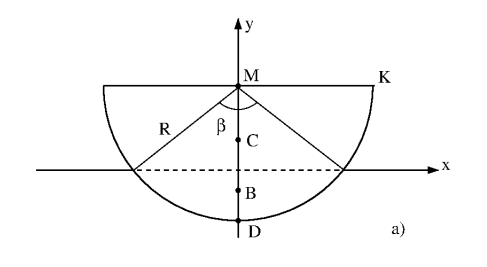

Sektorvinkelen når båten er i likevekt kaller vi $\beta$ og finnes ved å løse en fikspunktligning: 

$$
\beta - sin(\beta) = \frac{\pi \cdot \sigma}{\sigma_0} \\
\beta = sin(\beta)+ \frac{\pi \cdot \sigma}{\sigma_0}.
$$

Hvor $\sigma_0$ er tettheten til vann. Her er $\beta$ avhengig av seg selv slik at vi må ta i bruk numerisk metode for å løse likningen. Vi finner en ny $\beta$ for hver $\beta_{0}$ helt til differansen mellom disse to verdiene er mindre enn toleransen vår. Vi starter på $\beta_{0} = \frac{\pi}{2}$ og lar så vår numeriske fikspunktmetode regne ut $\beta$ med en toleranse på $10^{-9}$ .


In [48]:
def f_beta(x, skip_tetthet, vann_tetthet):
    return np.sin(x) + (np.pi * skip_tetthet)/vann_tetthet   #Skriver om ligningen på fikspunktform

def fikspunkt(f, x0, skip_tett, vann_tett, tol = 1e-8):
    x = x0                                                   #Kopierer startverdi
    steg = 0
    feil = 1e-8+1                                            #Gir først stor feil slik at den garantert går i while-løkka

    while feil > tol:
        x_gammel = x                                         #Kopierer gammaverdi
        x = f(x, skip_tett, vann_tett)                       #Regner ny gammaverdi av den forrige gammaverdien
        feil = abs(x-x_gammel)                               #Regner differansen
        steg += 1
    return x, steg                                           #Returnerer beta når feilen er liten nok


beta0, iterasjoner = fikspunkt(f_beta, np.pi/2, skip_tetthet, vann_tetthet, tol = 1e-8)        #Henter verdier

print(f'Beta = {beta0} radianer')

beta_grader = (beta0 * 180)/np.pi
print(f'Beta = {beta_grader} grader')


Beta = 2.309881463441468 radianer
Beta = 132.3464590306983 grader


$\beta$ er vinkelen som beskriver hvor mye av skipet som er i kontakt med vann når skipet er i likevekt. $\beta$-verdien er konstant når båten er i likevekt så vi definerer den utenfor funksjonen for å bruke verdien videre i alle de senere utregningene.

### 1b)

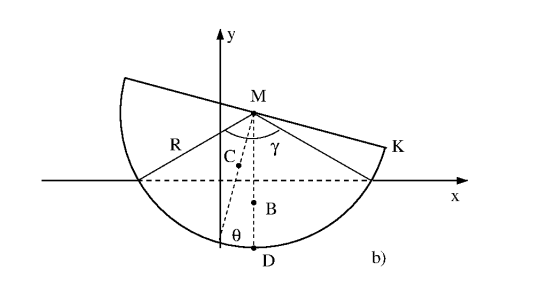

In [49]:
y0 = 0                                                        #Vannoverflate, y betegner høyde over vannoverflaten

y_M0 = R_skip*np.cos(beta0/2)                                                                 #Konstant i Likevekt
y_C0 = R_skip*np.cos(beta0/2) - cm_skip                                                       #Konstant i Likevekt
y_B0 = R_skip*np.cos(beta0/2) - (2*R_skip*(np.sin(beta0/2)**3)/(3*(beta0 - np.sin(beta0))))   #Konstant i Likevekt
y_D0 = R_skip*np.cos(beta0/2) - R_skip                                                        #Konstant i Likevekt

#Krefter
def F_G(m):                                                  #Tyngdekraft
    return - m*g

def F_B(R):                                                  #Oppdrift
    return areal(R)*vann_tetthet*g                           #Areal endres ikke av bevegelse slik at F_B blir lik F_G

def torque_B(R, theta):                                      #Dreiemoment om massesenter av fordrevet vann
    return -F_B(R)*h(R)*np.sin(theta)                        #Eneste bidrag til bevegelse av båten

print(f'Y_C0 = {y_C0} m')


Y_C0 = -0.20440429848347907 m


Vannoverflaten holdes ved y = 0 slik at alle punktene M, C, B og D har en y-verdi i forhold til dette nullpunktet. Ved likevekt er disse y-verdiene konstant, men dersom skipet er i bevegelse vil verdiene avhenge av andre parametre. Vi definerer y-verdiene ved likevekt samt kreftene og dreiemomentene som virker på systemet.

Vi antar at mengde fordrevet vann ikke endrer seg når båten går ut av likevekt slik at verdien A_fordrevetVann vi definerte i variabeldelen holdes konstant. Det resulterer i at $F_G$ vil være lik $F_B$, altså gravitasjonskraften for skipet og oppdriften er like slik at det eneste bidraget til bevegelse blir dreiemomentet om B. For bevegelse må vinkelen $\theta$ være ulik 0 om det skal bli noe verdi for $\tau_B$ .


### 1c)

Ettersom man i hele oppgave 1 skal ignorere alle krefter/dreiemomenter, utenom de som er gitt i ligning 14a, 14b og 15a i oppgaveteksten, samt antar at mengden fortrengt vann ikke endrer seg. Da vet man at $|F_A| = |F_B| $ slik at det kun er dreiemomentet $ \tau_B$ som bidrar til skipets bevegelse.

Vår bevegelsesligning er som følger:
$$ - m \cdot g \cdot sin(\theta) = I_{c} \cdot \ddot\theta.$$ 

Der har vi at $w = \frac{d\theta}{dt}$ slik at $\ddot\theta = \frac{dw}{dt}$
    
Ved bruk av $\sum \tau_B = I_c \cdot \frac{dw}{dt} $ og $ \tau = -F_b \cdot h \cdot sin(\theta) $ kan man skrive det første uttrykket som $\frac{dw}{dt} = f(t, w)$. 

Setter uttrykkene sammen $$-F_b\cdot h\cdot sin(\theta) = I_c \cdot \frac{dw}{dt}. $$ 

Løser for $\frac{dw}{dt}$


$$ \frac{dw}{dt} = \frac{-F_b \cdot h \cdot sin(\theta)}{I_c} $$

Løser opp $F_{b}$ til det den inneholder av variabler

$$ f(t,w) = \frac{dw}{dt} = \frac{-m \cdot g \cdot h \cdot sin(\theta)}{I_c}. $$


Nå står vi igjen med vår f(t,w) vektorfunksjon som vi trenger for å regne ut og analysere utviklingen av bevegelsen til båten når den gis en startvinkel. Vi skal benytte oss både av Eulers metode samt Runge-Kutta 4 for å løse differesiallikningen vår.

### 1d)

In [50]:
theta_0 = np.pi/9                                         #radianer, startvinkel
t0 = 0                                                    #tid start
t_end = 20                                                #tid slutt
h = 0.001                                                 #steglengde
w0 = 0                                                    #start vinkelfrekvens 

feil_h = 0.1                                              #feil steglengde

For å løse differensiallikningen trenger vi en del initialverdier som vi definerer her. Vi må ha en startvinkelverdi ulik 0, her 20 grader, men det trenger vi ikke for vinkelfart. Vi skal analysere situasjonen i en tid mellom 0 og 20 sekunder med en steglengde h på 0,001. Vi har valgt denne steglengden h fordi ved større steglengder begynte thetaverdien merkbart å øke, slik at amplituden i svingningene ble større og større. Eksempel på dette ligger under de to neste kodeblokkene.



In [51]:

def f(t, w_val):
    return np.array([w_val[0][1], -masse_skip*g*cm_skip*np.sin(w_val[0][0])/Ic_skip])    #f(t,w) som vi kom frem til 

def euler(f, t, w_val, h):   
    w_next = w_val + h* f(t, w_val)                                      #endre her 2d array, theta_i og omega_i
    return w_next

def ode_solver_euler(f,theta0, t0, t_end, w0, h, method): 
    #Initialisering
    w_num = np.array([[theta0, w0]])                              #Tom array med to og to elementer som skal fylles

    tn = np.linspace(t0, t_end, int(t_end/h)+1)                   #Lager array med tidene
    wn = np.array([[theta0, w0]])                                 #wn som er delmengder av w_num som skal fylle den
    i=0
    
    while tn[i] < t_end:                                          
          
        wn = method(f, tn[i], wn, h)                              #Gjør et steg med metoden vår, euler
        
        w_num = np.concatenate((w_num ,wn), axis=0)               #Legger til verdiene i arrayen vi har laget tidligere
        
        i+=1
    
    return tn, w_num


Vi definerer funksjonen vi fant frem til tidligere og så skal vi nå løse differensiallikningen ved Eulers metode. Funksjon f her returnerer en array som inneholder to elementer:
$$ \vec{W(t)} = [\theta(t) ,  w(t)] $$

For hvert steg finner vi samt lagrer disse vinkel og vinkelfrekvens verdiene i denne vektoren og til slutt returnerer vi både listen med tidene samt en liste med disse vektorene W for hver tidsverdi. 


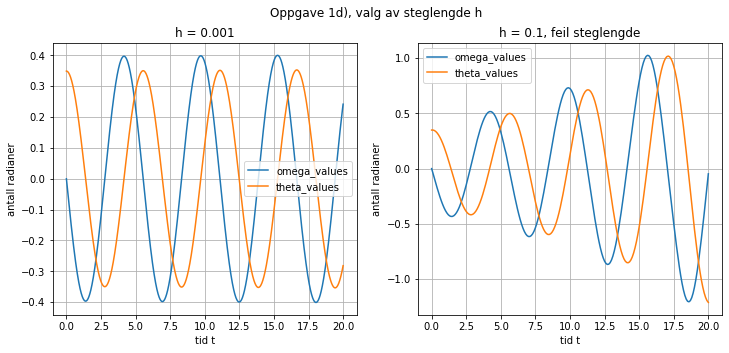

In [52]:
time_vals, w_vals = ode_solver_euler(f,theta0=theta_0, t0=t0, t_end=t_end, w0=w0, h=h, method=euler)
time_vals_feil, w_vals_feil = ode_solver_euler(f,theta0=theta_0, t0=t0, t_end=t_end, w0=w0, h=feil_h, method=euler)

fig_1d, (fig1, fig2) = plt.subplots(1,2, figsize=(12,5))
fig_1d.suptitle("Oppgave 1d), valg av steglengde h")
fig1.plot(time_vals, w_vals[:,1], label="omega_values")
fig1.plot(time_vals, w_vals[:,0], label="theta_values")
fig1.set_xlabel('tid t')
fig1.set_ylabel('antall radianer')
fig1.set_title('h = 0.001')
fig1.grid()
fig1.legend()

fig2.plot(time_vals_feil, w_vals_feil[:,1], label="omega_values")
fig2.plot(time_vals_feil, w_vals_feil[:,0], label="theta_values")
fig2.set_xlabel('tid t')
fig2.set_ylabel('antall radianer')
fig2.set_title('h = 0.1, feil steglengde')
fig2.grid()
fig2.legend()

plt.show()


Her ser vi tydelig hvordan en steglengde av feil størrelsesorden kan gi feil beregnede verdier, som vi kommenterte på lengre oppe i oppgaven. Plottet til høyre har en steglengde som er hundre ganger større, noe som fører til at feilen øker over tid. Dette samsvarer med teorien ettersom feilen etter N steg vil avhenge av størrelsen på steglengden. 

For plottet til venstre, som er det korrekte, så henter vi ut nevnte tidsvektor samt $\vec{w}$ med vinkel og vinkelfrekvensverdier for å plotte dem. Både vinkel og vinkelfrekvens har et repetativt mønster som svingninger med forskyvning i forhold til hverandre. Når vinkelutslaget er på sitt maksimale er vinkelfarten 0 og når vinkelen er 0, er vinkelfarten på sitt maksimale. Dette er korrekt oppførsel til periodiske svingninger, og med tanke på at $\omega = \frac{d\theta}{dt}$. Når det kommer til systemet vårt med skipet betyr disse verdiene at skipet svinger frem og tilbake på bølgene når skipet har fått en startfart. Skipets bunnpunkt blir som en pendel i forhold til skipets massesenter.

### 1e)

For $\theta << 1$ kan vi approksimere $sin(\theta) \approx \theta$.

In [53]:
one_degree = np.pi / 180 

def approx(t, w_val):                                                             #Funksjon der sin(theta) -> theta
    return np.array([w_val[0][1], -masse_skip*g*cm_skip*(w_val[0][0])/Ic_skip])


#20 grader med approx og euler
approx_time, approx_w = ode_solver_euler(approx,theta0=theta_0, t0=t0, t_end=t_end, w0=w0, h=h, method=euler) 

#1 grad med vanlig funksjon og euler
time_vals_one, w_vals_one = ode_solver_euler(f,theta0=one_degree, t0=t0, t_end=t_end, w0=w0, h=h, method=euler) 

#1 grad med approx og euler
approx_time_one, approx_w_one = ode_solver_euler(approx,theta0=one_degree, t0=t0, t_end=t_end, w0=w0, h=h, method=euler) 


Vi bruker approksimasjonen  $sin(\theta) \approx \theta$ når $\theta$ er liten nok. Vi setter dermed $\theta(t=0) = 1^{\circ}$. Utenom det returnerer approx akkurat det samme som funksjon f gjorde lenger opp. Hvor mye har det å si om vi gjør en småvinkelapproksimasjon?


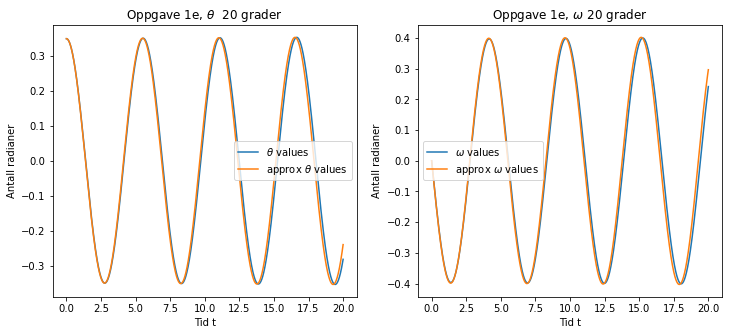

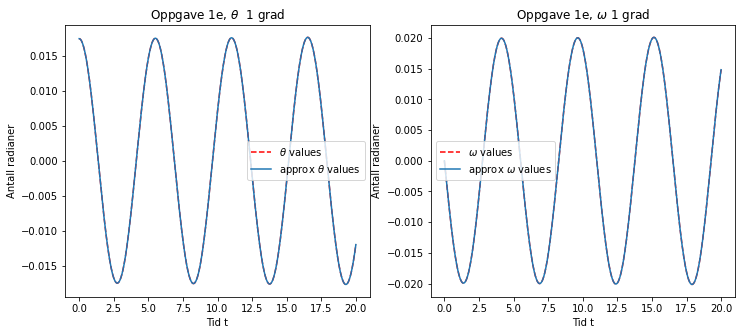

Ved småvinkelapproksimasjon og theta = 20 grader blir feilen 0.04206049486494459
Ved småvinkelapproksimasjon og theta = 1 grad blir feilen 5.7613408165936575e-06


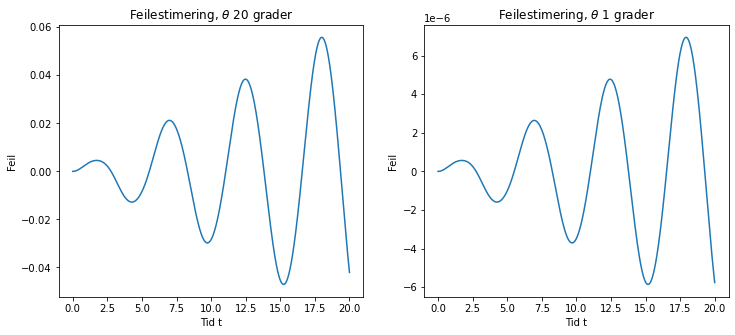

In [54]:
fig_1e, (fig3, fig4) = plt.subplots(1,2, figsize=(12,5))

fig3.plot(time_vals, w_vals[:,0], label=r'$\theta$' " values")
fig3.plot(approx_time, approx_w[:,0], label="approx "r'$\theta$' " values")
fig3.set_title("Oppgave 1e, " r'$\theta$' "  20 grader")
fig3.set_xlabel("Tid t")
fig3.set_ylabel("Antall radianer")
fig3.legend()

fig4.plot(time_vals, w_vals[:,1], label=r'$\omega$' " values")
fig4.plot(approx_time, approx_w[:,1], label="approx "r'$\omega$' " values")
fig4.set_title("Oppgave 1e, " r'$\omega$' " 20 grader")
fig4.set_xlabel("Tid t")
fig4.set_ylabel("Antall radianer")
fig4.legend()

fig_1e, (fig5, fig6) = plt.subplots(1,2, figsize=(12,5))
fig5.plot(time_vals_one, w_vals_one[:,0], '--r',label=r'$\theta$' " values")
fig5.plot(approx_time_one, approx_w_one[:,0], label="approx "r'$\theta$' " values")
fig5.set_title("Oppgave 1e, " r'$\theta$' "  1 grad")
fig5.set_xlabel("Tid t")
fig5.set_ylabel("Antall radianer")
fig5.legend()

fig6.plot(time_vals_one, w_vals_one[:,1], '--r',label=r'$\omega$' " values")
fig6.plot(approx_time_one, approx_w_one[:,1], label="approx "r'$\omega$' " values")
fig6.set_title("Oppgave 1e, " r'$\omega$' " 1 grad")
fig6.set_xlabel("Tid t")
fig6.set_ylabel("Antall radianer")
fig6.legend()

plt.show()

#Finner feil---------------------------------------------------------------
error_estimate_w = abs(w_vals[-1][0] - approx_w[-1][0])
error_estimate_w_one = abs(w_vals_one[-1][0]-approx_w_one[-1][0])

print(f'Ved småvinkelapproksimasjon og theta = 20 grader blir feilen {error_estimate_w}')
print(f'Ved småvinkelapproksimasjon og theta = 1 grad blir feilen {error_estimate_w_one}')

error_theta = (w_vals[:,0] - approx_w[:,0])
error_theta_one = w_vals_one[:, 0] - approx_w_one[:, 0]

fig_1e, (fig7, fig8) = plt.subplots(1,2, figsize=(12,5))

fig7.plot(time_vals ,error_theta)
fig7.set_title("Feilestimering, " r'$\theta$' " 20 grader")
fig7.set_xlabel("Tid t")
fig7.set_ylabel("Feil")                                   

fig8.plot(time_vals_one, error_theta_one)
fig8.set_title("Feilestimering, " r'$\theta$' " 1 grader")
fig8.set_xlabel("Tid t")
fig8.set_ylabel("Feil")

plt.show()


Ved småvinkelapproksimasjon kan vi såvidt se en differanse i løsningsverdiene ved en startvinkel på 20 grader, både i forhold til theta og vinkelfrekvens. Ved bruk av småvinkelapproksimasjon ser man i begge plottene at feilen øker mer og mer etterhvert. Likevel ser man også at ved $\theta = 20$ befinner feilen seg i størrelsesorden $10^{-2}$, men ved $\theta = 1$ har feilen en størrelsesorden på $10^{-6}$. Det er altså en svært mye mindre feil ved $\theta = 1$ enn ved $\theta = 20$, og vi kan konkludere med at småvinkelapproksimasjon fungerer best ved små vinkelutslag.


### 1f)

In [55]:

def rk4(f, t_val, w_val, h):                               #Runge kutta 4
    k1 = f(t_val, w_val)                                   #definerer k1, k2, k3 og k4 
    k2 = f(t_val + h/2, w_val + h*k1/2)
    k3 = f(t_val + h/2, w_val + h*k2/2)
    k4 = f(t_val + h, w_val + h*k3)

    w_next = w_val + (h/6)*(k1 + 2*k2 + 2*k3 + k4)         #Neste verdiene

    return w_next                                          #returnerer de neste verdiene

def ode_solver_rk4(f,theta0, t0, t_end, w0, h, method): 
    #Initialisering
    w_num = np.array([[theta0, w0]])                              #Tom array med to og to elementer som skal fylles

    tn = np.linspace(t0, t_end, int(t_end/h)+1)                   #Lager array med tidene
    wn = np.array([[theta0, w0]])                                 #wn som er delmengder av w_num som skal fylle den

    i=0
    
    while tn[i] < t_end:        
          
        wn = method(f, tn[i], wn, h)     #Gjør et steg med metoden vår, euler
        
        w_num = np.concatenate((w_num ,wn), axis=0)   #Legger til verdiene i arrayen vi har laget tidligere
        
        i+=1
    
    return tn, w_num                    #Returnerer tider og tilhørende theta og omega verdier


Her er Runge-Kutta av 4. orden implementert. Her er det mer avanserte delsteg enn ved Eulers metode, noe som er forklart i teoridelen. Vår løsning på differensiallikningen er derimot lik som den var for Euler. 

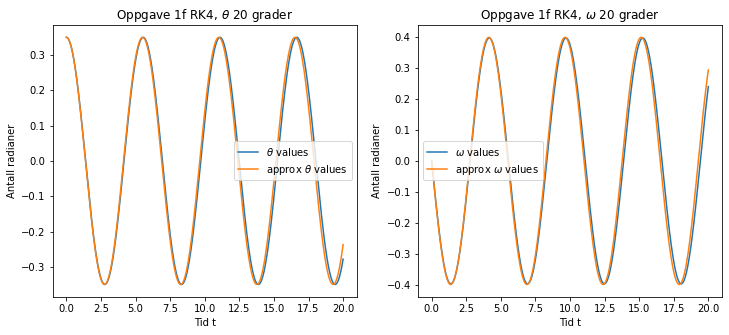

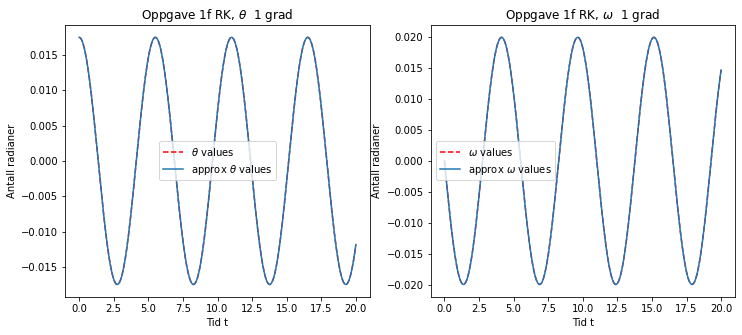

Ved småvinkelapproksimasjon og theta = 20 grader blir feilen 0.041066518225129744
Ved småvinkelapproksimasjon og theta = 1 grad blir feilen 5.616203986350335e-06


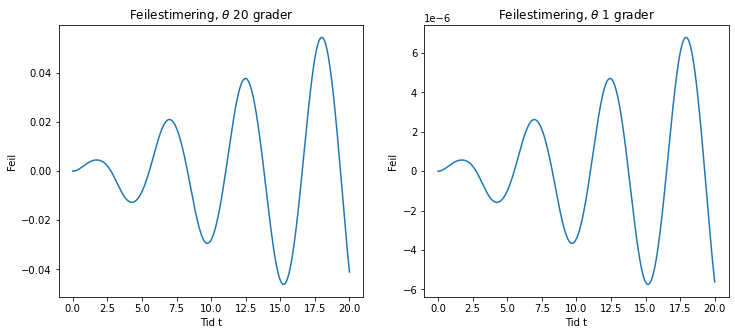

In [56]:

#20 grader med vanlig funksjon og rk4
rk_time_vals, rk_w_vals = ode_solver_rk4(f,theta0=theta_0, t0=t0, t_end=t_end, w0=w0, h=h, method=rk4)

#20 grader med approx og rk4
approx_rk_time_vals, approx_rk_w_vals = ode_solver_rk4(approx,theta0=theta_0, t0=t0, t_end=t_end, w0=w0, h=h, method=rk4)

fig_1f, (fig9, fig10) = plt.subplots(1,2, figsize=(12,5))

fig9.plot(rk_time_vals, rk_w_vals[:,0],label=r'$\theta$' " values")
fig9.plot(approx_rk_time_vals, approx_rk_w_vals[:,0],label="approx " r'$\theta$' " values")
fig9.set_title("Oppgave 1f RK4, " r'$\theta$' " 20 grader")
fig9.set_xlabel("Tid t")
fig9.set_ylabel("Antall radianer")
fig9.legend()

fig10.plot(rk_time_vals, rk_w_vals[:,1],label=r'$\omega$' " values")
fig10.plot(approx_rk_time_vals, approx_rk_w_vals[:,1],label="approx " r'$\omega$' " values")
fig10.set_title("Oppgave 1f RK4, " r'$\omega$' " 20 grader")
fig10.set_xlabel("Tid t")
fig10.set_ylabel("Antall radianer")
fig10.legend()

plt.show()

#1 grad med vanlig funksjon og rk4
rk_time_vals_one, rk_w_vals_one = ode_solver_rk4(f,theta0=one_degree, t0=t0, t_end=t_end, w0=w0, h=h, method=rk4)

#1 grad med approx og rk4
approx_rk_time_one, approx_rk_w_one = ode_solver_rk4(approx,theta0=one_degree, t0=t0, t_end=t_end, w0=w0, h=h, method=rk4)

fig_1f, (fig11, fig12) = plt.subplots(1,2, figsize=(12,5))

fig11.plot(rk_time_vals_one, rk_w_vals_one[:,0], '--r',label=r'$\theta$' " values")
fig11.plot(approx_rk_time_one, approx_rk_w_one[:,0], label="approx "r'$\theta$' " values")
fig11.set_title("Oppgave 1f RK, " r'$\theta$' "  1 grad")
fig11.set_xlabel("Tid t")
fig11.set_ylabel("Antall radianer")
fig11.legend()

fig12.plot(rk_time_vals_one, rk_w_vals_one[:,1], '--r',label=r'$\omega$' " values")
fig12.plot(approx_rk_time_one, approx_rk_w_one[:,1], label="approx "r'$\omega$' " values")
fig12.set_title("Oppgave 1f RK, " r'$\omega$' "  1 grad")
fig12.set_xlabel("Tid t")
fig12.set_ylabel("Antall radianer")
fig12.legend()

plt.show()

#Finner feil---------------------------------------------------------------
error_estimate_w = abs(rk_w_vals[-1][0] - approx_rk_w_vals[-1][0])
error_estimate_w_one = abs(rk_w_vals_one[-1][0]-approx_rk_w_one[-1][0])

print(f'Ved småvinkelapproksimasjon og theta = 20 grader blir feilen {error_estimate_w}')
print(f'Ved småvinkelapproksimasjon og theta = 1 grad blir feilen {error_estimate_w_one}')

error_theta = (rk_w_vals[:,0] - approx_rk_w_vals[:,0])
error_theta_one = rk_w_vals_one[:, 0] - approx_rk_w_one[:, 0]

fig_1f, (fig13, fig14) = plt.subplots(1,2, figsize=(12,5))

fig13.plot(rk_time_vals ,error_theta)
fig13.set_title("Feilestimering, " r'$\theta$' " 20 grader")
fig13.set_xlabel("Tid t")
fig13.set_ylabel("Feil")                                   

fig14.plot(rk_time_vals_one, error_theta_one)
fig14.set_title("Feilestimering, " r'$\theta$' " 1 grader")
fig14.set_xlabel("Tid t")
fig14.set_ylabel("Feil")

plt.show()


Her sammenligner vi plottene for både theta og omega med og uten bruk av småvinkelapproksimasjon. I tillegg er det her brukt Runge-Kutta av 4. orden istedenfor Eulers metode. Resultatene er svært like resultatene ved bruk av Eulers metode. Likevel kan man observere at feilen ved bruk av Runge-Kutta av 4. orden er noe mindre enn ved bruk av Eulers metode. Dette samsvarer med teorien for de to metodene ettersom Runge-Kutta av 4. orden er en noe bedre metode. 

I 1e ble feilen med bruk av Eulers metod, og 20 grader : 0.04206049486494459, mens med RK4 var den : 0.041066518225129744. For 1 grad var feilen 5.7613408165936575e-06 for Euler og 5.616203986350335e-06 for RK4. Her ser vi at feilen generelt er mindre for RK4, noe som samsvarer med teorien. 

### 1g)

Newtons 2. lov med rotasjon om C:
$$-mgh\theta = I_c\ddot{\theta}$$
$$\ddot{\theta} + \frac{mgh}{I_c}\theta = 0$$ 

Skriver om til karakteristisk ligning: $$ r^2 + \frac{mgh}{I_c} = 0 $$
$$ r^2 = -\frac{mgh}{I_c} $$
$$ r = i \cdot \sqrt\frac{mgh}{I_c} $$ 

Karakteristisk løsning for andre ordens differensialligning med komplekse røtter blir da $$\theta(t) = C_1\cdot cos(\sqrt\frac{mgh}{I_c} \cdot t) + C_2\cdot sin(\sqrt\frac{mgh}{I_c}\cdot t)$$

Ved bruk av initialverdiene $\theta(t = 0) = 0.01$ rad, $\omega(t = 0) = 0 $ rad/s finner vi $\tilde\theta(t)$.

$$\theta(t) = C_1 \cdot cos\sqrt\frac{mgh}{I_c} \cdot t) + C_2 \cdot sin(\sqrt\frac{mgh}{I_c} \cdot t)$$

$$\theta'(t) = C_2 \cdot \sqrt\frac{mgh}{I_c} \cdot cos(\sqrt\frac{mgh}{I_c} \cdot t) - C_1 \cdot \sqrt\frac{mgh}{I_c} \cdot sin(\sqrt\frac{mgh}{I_c} \cdot t)$$

Setter inn intialverdien $\theta(t = 0)  = 0.01$ i $\theta(t = 0)$:

$$C_1 \cdot 1 + C_2 \cdot 0 = 0.01  \rightarrow C_1 = 0.01 $$

Setter inn initialverdien $\omega(t = 0) = 0$ i $\theta'(t = 0)$: 

$$C_2 \cdot \sqrt\frac{mgh}{I_c} \cdot 1 - 0.01 \cdot \sqrt\frac{mgh}{I_c} \cdot 0 = 0 \rightarrow C_2 = 0$$


Får da at den analytiske løsningen med initialverdiene er:

$$\tilde\theta(t) = 0.01 \cdot (\sqrt\frac{mgh}{I_c} \cdot t). $$


Her har vi løst vår bevegelsesligning slik at vi har et utrykk for $\theta$ som er avhengig av tid. Vi har også to konstanter som avhenger av initialverdier. For $t=0$ får vi $\theta(t = 0) = C_{1}$ Så $C_{1}$ er vår startvinkel og $C_{2}$ er vår initial vinkelfrekvens.



### 1h) 

In [57]:
init_theta = 0.01                            #Startvinkel
init_w = 0                                   #Start vinkelfrekvens

analytic_val = 0.01 * np.cos(np.sqrt((masse_skip*g*cm_skip)/Ic_skip)*20)           #Analytisk verdi av theta(20)

def en_differanse(f,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w, h=h):

    euler_time, euler_w = ode_solver_euler(f,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w, h=h, method=euler)  #Henter
    numeric_euler_val = euler_w[-1:, 0]                                                         #siste theta-verdi i Euler
    euler_difference = abs(analytic_val - numeric_euler_val)                                    #Differanse 

    rk4_time, rk4_w = ode_solver_rk4(f,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w, h=h, method=rk4)    #Henter
    numeric_RK4_val = rk4_w[-1:,0]                                                               #siste theta-verdi i RK4
    rk4_difference = abs(analytic_val-numeric_RK4_val)                                           #Differanse

    return euler_difference, rk4_difference

h_list = [0.0001, 0.001, 0.01, 0.1]                                             #Ulike steglengder

def differanse(f,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w):

    euler_difference_arr = np.array([])                                 #Skal fylles for ulike differanser avhengig av h
    rk4_difference_arr = np.array([])                                   #Skal fylles for ulike differanser avhengig av h

    for i in h_list:
        euler_difference, rk4_difference = en_differanse(f,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w, h=i)  #Henter

        euler_difference_arr = np.concatenate((euler_difference_arr, euler_difference))       #Legger til i array
        rk4_difference_arr = np.concatenate((rk4_difference_arr, rk4_difference))             #Legger til i array
        
    return euler_difference_arr, rk4_difference_arr 


Vi skal finne differansen mellom analytisk og numerisk løsning i forhold til $\theta$. Vi bruker derfor vår analytiske løsning og regner ut en verdi for $\theta(t=20)$ før vi finner tilsvarende svar for de ulike metodene våre. Deretter regner vi differansen av de verdiene og gjentar dette for alle de ulike h-verdiene i listen vår.

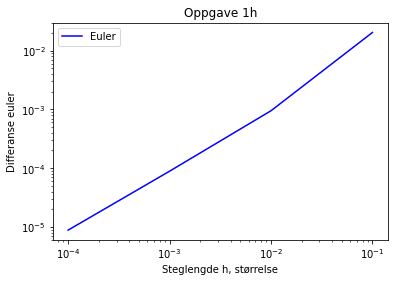

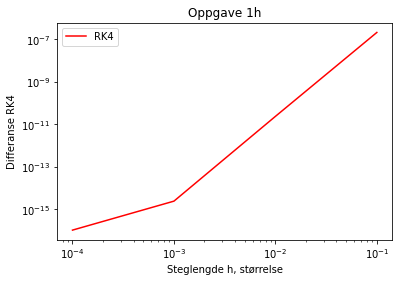

In [58]:
euler_difference, rk4_difference = differanse(approx,theta0=init_theta, t0=t0, t_end=t_end, w0=init_w)

plt.figure(14)
plt.loglog(h_list, euler_difference, color='blue' ,label="Euler")
plt.title("Oppgave 1h")
plt.xlabel("Steglengde h, størrelse")
plt.ylabel("Differanse euler")
plt.legend()
plt.show()

plt.figure(15)
plt.loglog(h_list, rk4_difference, color='red', label="RK4")
plt.title("Oppgave 1h")
plt.xlabel("Steglengde h, størrelse")
plt.ylabel("Differanse RK4")
plt.legend()
plt.show()



Vi plotter differansen mellom den analytiske og den numeriske løsningen for både Euler og RK4 ved t = 20 som funksjon av h. Vi ser at når h minker så minker også feilen for begge metodene. I tillegg er det en større differanse mellom den numeriske og analytiske løsningen ved bruk av Eulers metode; noe som er forventet ettersom Euler er en førsteordens metode som har en lineær tilnærming for løsing av systemet. Systemet vårt er derimot et andregradsuttrykk, dermed ville en metode av minst grad 2 vært mer hensiktsmessig.

Ved bruk av Runge Kutta av 4. orden ser man at feilen flater ut ved små verdier av h. Dette skjer ettersom elementene som legges til for hvert steg i RK4-metoden er så små at datamaskinen runder av tallene på en slik måte at den laveste relative feilen vi kan få er omtrentlig $10^{-15}$. 


# Oppgave 2

Nå ønsker vi å gå litt nøyere til verks og ha et mer avansert system for skipet. Sektorvinkelen relativt til metasenteret på dekk skal nå ha mulighet til å variere. Dette vil påvirke mengden fortrengt vann som igjen påvirker krefter og posisjoner. Vi trenger nye uttrykk for systemets totale bevegelse, og vi skal la skipet få mulighet til å kantre om betingelsene for det er oppfylt. Kommer det vann over dekket til skipet slik det gjorde for Vasaskipet, vil det altså kantre. Vi skal også legge til last, og undersøke dens påvirkning på skipets bevegelser. Lasten skal både ha mulighet til å falle av skipet samt bli stoppet av gjerder langs kanten på skipets dekk. Videre skal vi undersøke hvordan friksjonen mellom skroget og vannet samt vind og bølger vil påvirker skipets bevegelser. 


### Konstanter og variabler

I denne delen av simulasjonen av skipet kommer vi til å endre nye konstanter og variabler svært ofte slik at vi må definere de underveis i oppgaven. En del av konstantene fra første del av prosjektet skal fortsatt brukes i denne delen, og trenger dermed ikke å bli definert igjen. 

### 2a)

Ettersom arealet av fortrengt vann fra nå vil variere, vil ikke massesenteret ligge i ro. Dermed vil ligningene $$\sum \vec{F} = m \cdot \frac{d^2\vec{R}}{dt^2} $$ og $$ \sum \tau = I_c \frac{dw}{dt}$$ være koblede. Dette vil medføre at $\vec{w}$ endres til å (i denne deloppgaven) inneholde x- og y-koordinatene til massesenteret til båten og tilhørende hastigheter. Foreløpig vil det ikke virke noen krefter i horisontal retning, og dermed vil verken x eller $v_x$ endre seg. Dermed vil de ikke bidra til $\frac{d\vec{w}}{dt}$.

$$\frac{d\vec{w}}{dt} = \frac{d}{dt} \cdot \begin{bmatrix} \theta(t) \\ \omega(t) \\ y_C \\ v_y \end{bmatrix}$$

$$\frac{d\vec{w}}{dt} = \begin{bmatrix} \omega(t) \\ -\frac{A\sigma_0ghsin(\theta(t))}{I_c} \\ v_{y}(t) \\ -g + \frac{A(t)\sigma_0g}{m} \end{bmatrix}$$

Hvor $A = \frac{1}{2}R^2(\gamma - sin(\gamma))$.

Og $\gamma = 2 \cdot cos^{-1}(cos(\frac{\beta}{2}) - \frac{4 \cdot R}{3 \cdot \pi} \cdot (1-cos(\theta)) + \frac{\Delta y_{c}}{R}$

Denne nye f(t,w) skal vi på ny bruke Runge-Kutta 4 metoden på for å løse for ulike initialverdier.

### 2b)

In [59]:

theta_0 = np.pi/9                                         #radianer, startvinkel
t0 = 0                                                    #tid start
t_end = 20                                                #tid slutt
h = 0.001                                                 #steglengde
w0 = 0                                                    #start vinkelfrekvens 
v_val = 0 

def general_ODE_solver(f, t0, t_end, w_val, h, method):
    t_arr = np.linspace(t0, t_end, int(t_end/h)+1)         #Liste med t-verdier                                        
    
    w_arr = np.zeros((len(t_arr), len(w_val)))       #Liste med dimensjonene vi ønsker, avhenger av tidene og storrelse på f
    w_arr[0] = w_val                                 #Vår første er initialbetingelsene
    wn = w_arr[0]                                    #Definerer wn som vi skal bruke videre
    
    for i in range(1, len(t_arr)):
        w_new = method(f, t_arr[i], wn, h)           #Henter ut verdiene i neste steg
        
        w_arr[i] = w_new                             #Legger til i matrisen
        
        wn = w_new                                   #Definerer den vi skal jobbe med på neste runde
        
    return t_arr, w_arr

def f_2b(t_val, w_val):
    theta = w_val[0]                                                                              #Theta
    gamma = 2*np.arccos(np.cos(beta0/2)-4/(3*np.pi)*(1-np.cos(theta))+(w_val[2] - y_C0)/R_skip)   #Gamma
    A = 1/2*R_skip**2*(gamma-np.sin(gamma))                                                       #Fordrevet vannareal
    r = np.array([w_val[1], -(A *g*vann_tetthet* cm_skip * np.sin(w_val[0]))/Ic_skip,
        w_val[3], -g + A*g*vann_tetthet/masse_skip], dtype='float')                               #Nye verdier
    return r


Vår startvinkel skal være 20 grader som før og vi skal se på systemet mellom $t=0$ og $t=20$ med en steglengde på 0,001. Vår start-vinkelfrekvens er 0 rad/s og startfart er også 0. Vi definerer igjen en funksjon som gir en løsning av differensialligningen. Endringen fra tidligere er at den tar hensyn til at startinitialene som den skal oppdatere kan være av ulikt antall. Vi definerer også en ny f(t,w) som tar hensyn til at arealet av fortrengt vann vil variere.

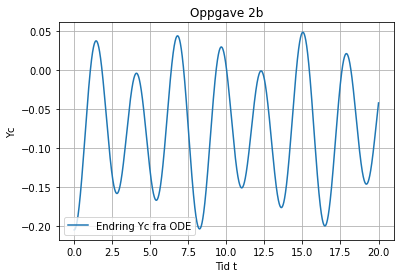

In [60]:
w_val_0 = np.array([theta_0, w0, y_C0, v_val])                                                    #Initialverdiene

t_arr, w_val = general_ODE_solver(f_2b, t0, t_end, w_val_0, h, method = rk4)

plt.figure(16)
plt.plot(t_arr, w_val[:,2], label="Endring Yc fra ODE")
plt.title("Oppgave 2b") 
plt.xlabel("Tid t")
plt.ylabel("Yc")
plt.grid()
plt.legend()
plt.show()
        

Vi ser at posisjonen til massesenteret C varierer som funksjon av $\theta$ som igjen varierer som funksjon av tid. Endringen skjer fordi $Y_{c}$ avhenger av mengde fortrengt vann, som igjen avhenger av $\gamma$ som igjen avhenger av $\theta$. Vi ser at posisjonen har en periodisk utvikling, men med varierende amplituder. Mengden fortrengt vann gir ulik oppdrift for ulike vinkler og $Y_{c}$ får en logisk duppebevegelse som resultat av dette.



### 2c)

In [61]:

def signum(x):                   #Funksjon for når skipet kantrer så skal vi endre theta
    if x > 0:
        k = 1
    if x == 0:
        k = 0
    if x < 0:
        k = -1
    return k

def ODE_m_kantring(f, t0, t_end, w_val, h, method):            #Løsning av difflikning, tar hensyn til kantring
    t_arr = np.linspace(t0, t_end, int(t_end/h)+1)             #Lager liste med tidene
    tn = t_arr[0]
    
    w_arr = np.zeros((len(t_arr), len(w_val)))       #Liste med dimensjonene vi ønsker, avhenger av tidene og storrelse på f
    w_arr[0] = w_val                                 #Vår første er initialbetingelsene
    wn = w_arr[0]                                    #Definerer wn som vi skal bruke videre
    
    t_sink = 0                                       #Tidspunkt kantring
    
    for i in range(1, len(t_arr)):
        w_new = method(f, tn, wn, h)                 #Henter ut verdiene

        tn = t_arr[i]                                #Oppdaterer til neste tidspunkt

        theta = w_new[0]                             #Henter theta
        gamma = 2*np.arccos(np.cos(beta0/2)-4/(3*np.pi)*(1-np.cos(theta))+(w_new[2] - y_C0)/R_skip)  #Regner gamma
        
        
        if abs(theta) > (np.pi - gamma)/2:                 #Krav for kantring
            w_new = np.zeros(len(w_arr[0]))                #Alle verdier skal bli 0
            w_new[0] = signum(w_arr[i-1][0]) * np.pi/2     #Utenom theta, den skal få denne verdien
            w_arr[i] = w_new                               #Oppdaterer matrisen
            wn = w_new                                     #Skal bruke videre
            

            if t_sink != 0:                               #Hvis skipet allerede har sunket skal ingenting skje
                continue
            else:                                         #Hvis første tid den synker så skal vi oppdatere tidspunkt
                t_sink = t_arr[i]
            
        else:
            w_arr[i] = w_new                              #Ingen kantring? Vi bare går videre
            wn = w_new
        
    return t_arr, w_arr, t_sink


Vi lager en funksjon som gir oss riktig verdi for $\theta$ etter kantring før vi gjør de endringene som trengs i løseren av differensiallikningen. Den er så og si lik som tidligere, men vi henter her ut $\theta$ og $\gamma$ for å sjekke om kravet for kantring er oppfylt. Er kravet oppfylt skal alle verdiene utenom $\theta$ settes til 0 samt at tidspunktet for kantringen blir lagret. 

Forste kantretid, omega = 1.0
Skipet kantret når w0(startvinkelfrekvens) var 1.0 rad/s
Siste seiletid, omega = 0.0
Forste kantretid, omega = 0.5
Skipet kantret når w0(startvinkelfrekvens) var 0.5 rad/s
Siste seiletid, omega = 0.4
Forste kantretid, omega = 0.44
Skipet kantret når w0(startvinkelfrekvens) var 0.44 rad/s
Siste seiletid, omega = 0.43
Forste kantretid, omega = 0.432
Skipet kantret når w0(startvinkelfrekvens) var 0.432 rad/s
Siste seiletid, omega = 0.431
Forste kantretid, omega = 0.4317
Skipet kantret når w0(startvinkelfrekvens) var 0.4317 rad/s
Siste seiletid, omega = 0.4316


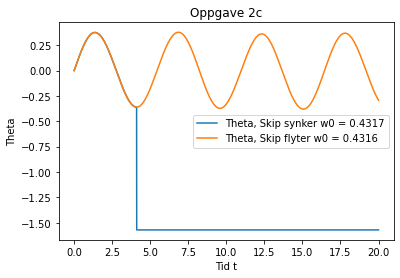

In [62]:

theta_0rad = 0
w_val_0 = np.array([theta_0rad, w0, y_C0, v_val])         #Initialbetingelser


w0_forste_kantretid = 10                                  #Start, der vi garantert vet skipet kantrer
w0_siste_ikkekantretid = 0                                #Start, der vi garantert vet skipet flyter


for i in range(5):
    w0_list = np.linspace(w0_siste_ikkekantretid, w0_forste_kantretid,11)       #Lager verdier mellom flyt og kantrer
    for i in range(len(w0_list)):
        w_val_0[1] = w0_list[i]                                                 #Lager initialbetingelse for hver nye w
        t_arr, w_val, t_sink = ODE_m_kantring(f_2b, t0, t_end, w_val_0, h, method = rk4)  #Henter verdiene

        if t_sink != 0:                                       #Hvis den synker så oppdaterer vi kantring og flyte verdiene
            w0_forste_kantretid = w0_list[i]
            print(f'Forste kantretid, omega = {w0_forste_kantretid}')
            print(f'Skipet kantret når w0(startvinkelfrekvens) var {w0_list[i]} rad/s')
            w0_siste_ikkekantretid = w0_list[i-1]
            print(f'Siste seiletid, omega = {w0_siste_ikkekantretid}')
            break

            
w_val_0_sink = np.array([theta_0rad, w0_forste_kantretid, y_C0, v_val])              #Lager initialbetingelser
w_val_0_float = np.array([theta_0rad, w0_siste_ikkekantretid, y_C0, v_val])          #Lager initialbetingelser

t_arr_sink, w_val_sink, t_sink = ODE_m_kantring(f_2b, t0, t_end, w_val_0_sink, h, method = rk4)      #Henter verdiene
t_arr_float, w_val_float, t_float = ODE_m_kantring(f_2b, t0, t_end, w_val_0_float, h, method = rk4)  #Henter verdiene

plt.figure(17)
plt.plot(t_arr_sink, w_val_sink[:,0], label=f'Theta, Skip synker w0 = {w0_forste_kantretid}')
plt.plot(t_arr_float, w_val_float[:,0], label=f'Theta, Skip flyter w0 = {w0_siste_ikkekantretid}')
plt.title("Oppgave 2c") 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()


Startvinkel skal være 0, og vi lager en liste med initialbetingelsene. Vi ønsker så å finne hvilke startverdier for $\omega$ som akkurat gir kantring samt verdien rett før den som akkurat ikke gir kantring. Vi definerer to starvinkelfrekvenser som garantert vil gi kantring og ikke. For hver runde i for-løkka deler vi opp dette intervallet mellom omegaene. Så sjekker vi hver verdi med ODE-løseren vår. Om skipet kantrer lagrer vi denne vinkelfrekvensverdien samt verdien rett før fordi den må dermed gi ikke-kantring. Dette gjentar vi 5 ganger noe som resulterer i en desimal bedre nøyaktighet for hver runde. Til slutt står vi igjen med to vinkelfrekvensverdier som skilles med en verdi på 0.0001, derav den ene gir kantring på skipet og den andre ikke.

Da bruker vi disse verdiene til å lage to lister med initialbetingelser før vi bruker ODE_solver til å hente verdienes  utvikling. Vi plotter utviklingen til vinkelen for de to ulike startverdiene til $\omega$ som vi kom frem til tidligere. Det blir da svært tydelig at skipet kantrer ved $\omega_0 = 0.4317$, men ikke ved $\omega_0 = 0.4316$. Det er altså bare 0.0001 som skiller de to fra hverandre. 

### 2d)


Videre legger vi på en last på skipet. For å forenkle systemet blir lasten behandlet som en punktpartikkel som sklir friksjonsfritt på skipsdekket. Dermed kan vi se på denne lasten som en friksjonsfri kloss på et skråplan, hvor lastens akselerasjon kun avhenger av tyngdeakselerasjonen $g$ og vinkelen $\theta$. 

Med last på skipet må mange størrelser som har tidligere blitt bestemt, må beregnes på nytt ettersom den totale massen har endret seg, slik at $m_{total} = m_{skip} + m_{last} $.

Lasten på skipet vil også skape et dreiemoment om massesenteret til skipet, og vi må beregne $\sum\tau$ på nytt som tar hensyn til lasten.
$$\sum\tau = \tau_L + \tau_B = -m_L \cos(\theta(t))s_L - F_bh\sin(\theta(t)) = \frac{d\omega}{dt} I_c$$


$$\frac{d\vec{w}}{dt} = \frac{d}{dt} \cdot \begin{bmatrix} \theta(t) \\ \omega(t) \\ x_C \\y_C \\ v_x \\ v_y \\ s_{L_x} \\ v_{L_x} \end{bmatrix}$$

$$\frac{d\vec{w}}{dt} = \begin{bmatrix} \frac{d\theta}{dt}\\ \frac{d\omega}{dt} \\v_x \\v_y \\ a_{x}(t) \\a_{y}(t) \\ \frac{ds_{L_x}}{dt}\\ a_{L_x}  \end{bmatrix} = 
\begin{bmatrix} \omega(t) \\ \frac{-m_L cos(\theta(t))s_L - A\sigma_0ghsin(\theta(t))}{I_c} \\ v_{x}(t) \\v_{y}(t) \\ \frac{m_Lgcos(\theta(t))sin(\theta(t))}{m_{total}}\\ -g + \frac{A(t)\sigma_0g - m_L g cos^2(\theta(t))}{m_{total}} \\ v_{Lx} \\  gsin(\theta(t)) \end{bmatrix}$$

Hvor $A = \frac{1}{2}R^2(\gamma - sin(\gamma))$.



Og $\gamma = 2 \cdot cos^{-1}(cos(\frac{\beta}{2}) - \frac{4 \cdot R}{3 \cdot \pi} \cdot (1-cos(\theta)) + \frac{\Delta y_{c}}{R}$

In [63]:

#Masse ------------------------------------------------------------
mL1 = 0.001*masse_skip      
mL2 = 0.08*masse_skip
  
def total_masse(lastvekt):
    return masse_skip + lastvekt

m_tot1 = total_masse(mL1)
m_tot2 = total_masse(mL2)

skip_tetthet_last1 = (m_tot1)/areal_skip(R_skip)
skip_tetthet_last2 = (m_tot2)/areal_skip(R_skip)

#Beregne nye likevektsparametre -----------------------------------------------

beta1_1, iterasjon = fikspunkt(f_beta, np.pi/2, skip_tetthet_last1, vann_tetthet, tol=1e-8)
beta1_2, iterasjon = fikspunkt(f_beta, np.pi/2, skip_tetthet_last2, vann_tetthet, tol=1e-8)


#Parametre------------------------------------------------------
t0 = 0    
t_end = 40

sl_x = 3
vl_x = 0
w0_2d = 0.2 
theta_2d = 0
x_C0 = 0
v_val_x = 0
v_val_y = 0

y_C0_2d1 = R_skip * np.cos(beta1_1/2) - cm_skip  
y_C0_2d2 = R_skip * np.cos(beta1_2/2) - cm_skip

#Ode solver-----------------------------------------------------
def ODE_2(f, m_tot, yC, t0, t_end, w_val, h, method, beta, mL = 0, last = False, gjerde = False, kF = 0):

    t_arr = np.linspace(t0, t_end, int(t_end/h)+1)           #Lager liste med tidsverdier
    tn = t_arr[0]                                            #Henter første tid 

    w_arr = np.zeros((len(t_arr), len(w_val)))               #Lager matrise med dimensjonene til tid samt initialbetingelser
    w_arr[0] = w_val                                         #Første rad i matrise er initialbetingelsene
    wn = w_arr[0]                                            #Skal bruke wn i metoden

    kantring = 0                                             #Lagrer tidspunktet skipet kantrer

    last_fall = 0                                            #Lagrer tidspunktet lasten faller
    last = True
  
    for i in range(1, len(t_arr)):
        theta = wn[0]                                                                                  #Theta
        gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)        #Gamma
        
        if abs(theta) > (np.pi - gamma)/2:                                                             #Kantrebetingelse
            kantring = i - 1                                                                           #Lagrer tidspunkt
            w_arr[kantring + 1, 0] = np.sign(w_arr[kantring - 1, 0]) * np.pi/2  
                                                                         #Endrer thetaverdi slik at kantring er tydelig
            break

        if last == True:                      
            if abs(wn[6]) > R_skip:               #Last er forbi kanten av skipet
                if gjerde == False:               #Gjerder til å stoppe lasten?
                    mL = 0                        #Ingen gjerder forsvinner lasten vekk
                    m_tot=masse_skip              #Totalmassen til skipet endres
                    last = False                  #Lasten er borte
                    last_fall = i                 #Lagrer tidspunktet det skjer
            
                else:
                    w_new[6] = np.sign(w_arr[i-1, 6]) * R_skip       #Er det gjerder skal lastens plassening være på kanten
                    w_new[7] = 0                                     #Farten til lasten skal bli 0

        w_new = method(f, tn, wn, h)              #Henter nye verdier
        
        w_arr[i] = w_new                          #Oppdaterer
        wn = w_new

        tn = t_arr[i]

    if last_fall != 0 and gjerde == False:         
        w_arr[last_fall:,6] = w_arr[last_fall - 1, 6] + w_arr[last_fall - 1, 7]*2  #Har lasten falt av oppdaterer vi verdi

    return t_arr, w_arr, kantring*h, last_fall*h
        
#----------------------------------------------------

def f_2d1(t, w_val):                   #f for mL1, vi må regne egne gamma, Arealverdi osv når massen er endret
    theta = w_val[0]
    omega = w_val[1]
    x = w_val[2]
    y = w_val[3]
    v_x = w_val[4]
    v_y = w_val[5]
    s_L = w_val[6]
    v_L = w_val[7]   #er 0 i y-retning
    
    gamma_2d = 2 * np.arccos(np.cos(beta1_1/2)-4/(3*np.pi)*(1-np.cos(theta))+(y - y_C0_2d1)/R_skip)
    A_2d = 1/2*R_skip**2*(gamma_2d-np.sin(gamma_2d))
    
    domegadt = - (A_2d * vann_tetthet * g * cm_skip * np.sin(theta) +  (mL1 * g * np.cos(theta) * abs(s_L)) )/Ic_skip 

    a_x = mL1 * g * np.cos(theta) * np.sin(theta)/m_tot1
    a_y = (-m_tot1*g + A_2d*vann_tetthet*g - mL1*g*np.cos(theta)**2)/m_tot1
    a_L = -g * np.sin(theta)                     #ikke cos fordi det i heftet er fra last på skip, og ikke på last! 
    
    f = np.array([omega, domegadt, v_x, v_y, a_x, a_y, v_L, a_L])

    return f

def f_2d2(t, w_val):             #f for mL2, vi må regne egne gamma, Arealverdi osv når massen er endret
    theta = w_val[0]
    omega = w_val[1]
    x = w_val[2]
    y = w_val[3]
    v_x = w_val[4]
    v_y = w_val[5]
    s_L = w_val[6]
    v_L = w_val[7]   #er 0 i y-retning

    gamma_2d = 2*np.arccos(np.cos(beta1_2/2)-4/(3*np.pi)*(1-np.cos(theta))+(y - y_C0_2d2)/R_skip)
    A_2d = 1/2 * R_skip**2 * (gamma_2d-np.sin(gamma_2d))

    domegadt = - (A_2d * vann_tetthet * g * cm_skip * np.sin(theta) +  (mL2 * g * np.cos(theta) * abs(s_L)) )/Ic_skip 

    a_x = mL2*g*np.cos(theta)*np.sin(theta)/m_tot2
    a_y = (-m_tot2*g + A_2d*vann_tetthet*g - mL1*g*np.cos(theta)**2)/m_tot2
    a_L = -g * np.sin(theta)                     #ikke cos fordi det i heftet er fra last på skip, og ikke på last! 
    
    f = np.array([omega, domegadt, v_x, v_y, a_x, a_y, v_L, a_L])

    return f


Nå som vi skal la skipet ha last på dekk er det mye mer å ta hensyn til. Lasten har en masse som påvirker skipets totale masse og dette endrer $\beta$ som igjen endrer $\gamma$ samt krefter som oppdrift. Lastens posisjon i forhold til midtpunkt på skipet vil gi et bidrag til dreiemomentet på skipet. Vi definerer alle de nye verdiene vi trenger samt legger inn initialbetingelsene vi er gitt. Vi lager så en løser for systemet som både tar hensyn til om last er ombord, samt om vi har gjerder på dekk eller ikke. Hvis vinkelen $\theta$ blir for stor skal skipet kantre, blir utsvinget til lasten utenfor kanten av skipet skal lasten falle av og skipets totale masse endre og om vi har gjerder skal lasten miste farten sin på kanten. Vi lagrer tidspunktene som lasten faller av om den gjør det, samt tidspunktet for kantring om det skjer. Vi lager to funksjoner for utviklingen til initialbetingelsene som oppdaterer verdiene våre for hvert element i tiden vår. Elementene som f-funksjonene inneholder er forklart ovenfor og eneste ulikhet er masseverdiene.

Når mL = 78.53981633974485 kg, altså 0.001m, vil lasten falle av ved t=8.49 s
Når mL = 6283.185307179587 kg, altså 0.08m, vil lasten falle av ved t=16.86 s
Når mL = 78.53981633974485 kg, altså 0.001m, vil skipet ikke kantre
Når mL = 6283.185307179587 kg, altså 0.08m, vil skipet kantre ved t=18.29 s


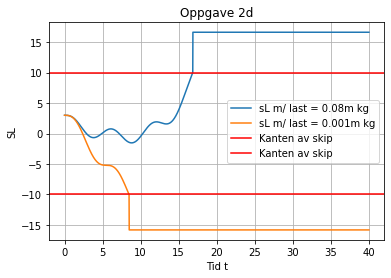

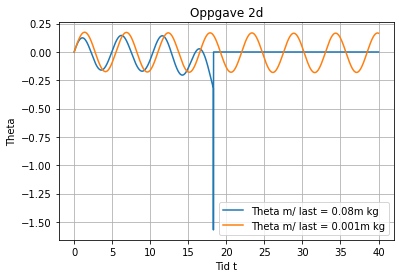

In [64]:

#Lager liste med initialverdier og henter verdier etter løsning av differensiallikning
w_val_2d1 = np.array([theta_2d, w0_2d, x_C0, y_C0_2d1, v_val_x, v_val_y, sl_x, vl_x]) 
w_val_2d2 = np.array([theta_2d, w0_2d, x_C0, y_C0_2d2, v_val_x, v_val_y, sl_x, vl_x]) 

tid1, plot1, kantring1, last_fall1 = ODE_2(f_2d1, m_tot1, y_C0_2d1, 0, 40, w_val_2d1, 0.01, method = rk4,beta = beta1_1, 
                                           mL = mL1, last = True, gjerde = False, kF = 0) 
tid2, plot2, kantring2, last_fall2 = ODE_2(f_2d2, m_tot2, y_C0_2d2, 0, 40, w_val_2d2, 0.01, method = rk4,beta = beta1_2, 
                                           mL = mL2, last = True, gjerde = False, kF = 0) 


#Hva skjer ift last samt kantring? ---------------------------------

if last_fall1 !=0:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil lasten falle av ved t={last_fall1} s')
else:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil ikke lasten falle av')
if last_fall2 !=0:
    print(f'Når mL = {mL2} kg, altså 0.08m, vil lasten falle av ved t={last_fall2} s')
else:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil ikke lasten falle av')

if kantring1 !=0:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil skipet kantre ved t={kantring1} s')
else:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil skipet ikke kantre')
if kantring2 !=0:
    print(f'Når mL = {mL2} kg, altså 0.08m, vil skipet kantre ved t={kantring2} s')
else:
    print(f'Når mL = {mL2} kg, altså 0.08m, vil skipet ikke kantre')

#plotting-------------------------------------------------------------

plt.figure(18)
plt.plot(tid2,plot2[:,6], label="sL m/ last = 0.08m kg")
plt.plot(tid1,plot1[:,6], label="sL m/ last = 0.001m kg")
plt.title("Oppgave 2d") 
plt.grid()
plt.xlabel("Tid t")
plt.ylabel("SL")
plt.axhline(-10, color = 'r', label="Kanten av skip")
plt.axhline(10, color = 'r', label="Kanten av skip")
plt.legend()
plt.show()

plt.figure(19)
plt.plot(tid2,plot2[:,0], label="Theta m/ last = 0.08m kg")
plt.plot(tid1,plot1[:,0], label="Theta m/ last = 0.001m kg")
plt.grid()
plt.title("Oppgave 2d") 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()


Vi velger å kjøre flere if-setninger for å sjekke hva som skjer i forhold til kantring og om lasten faller av. Når massen til lasten er $0.001m$ faller lasten av ved $t = 8.39s$ og da ser vi på plottet til posisjonen at lasten tydelig har falt forbi skipets kant. Svingningen, $\theta$ til skipet får noe økt amplitude etter lasten har falt av og fortsetter sin svingebevegelse.

Når massen til lasten er $0.08m$ faller lasten av rett etter $t = 16.86s$ og da ser vi igjen på plottet slik vi så på den andre lasten at posisjonen er langt utenfor kanten av skipet. Siden denne lastmassen er såpass stor i forhold til skipets masse får skipet en stor endring i svingebevegelse av at lasten faller av, og skipet kantrer. 

### 2e)

Lasten faller ikke av med gjerdene på
Når mL = 78.53981633974485 kg, altså 0.001m, vil skipet ikke kantre
Når mL = 6283.185307179587 kg, altså 0.08m, vil skipet kantre ved t=18.46 s


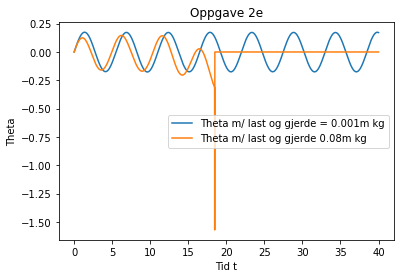

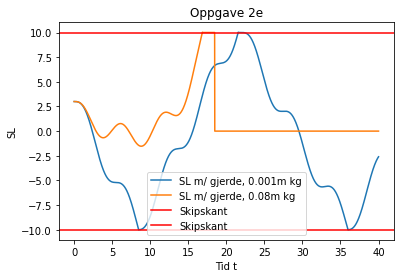

In [65]:

#Henter nye løsninger når gjerdene er tilstede, eneste ulikt fra 2f) er at her er gjerde=True istedenfor False
tid3, plot3, kantr3, last_fall3 = ODE_2(f_2d1, m_tot1, y_C0_2d1, 0, 40, w_val_2d1, 0.01, method = rk4,beta = beta1_1, 
                                        mL = mL1, last = True, gjerde = True, kF = 0) 
tid4, plot4, kantr4, last_fall4 = ODE_2(f_2d2, m_tot2, y_C0_2d2, 0, 40, w_val_2d2, 0.01, method = rk4,beta = beta1_2, 
                                        mL = mL2, last = True, gjerde = True, kF = 0) 

#Sjekker om lasten faller av eller ikke
if last_fall3 ==0 and last_fall4 == 0:
    print(f'Lasten faller ikke av med gjerdene på')

if kantr3 !=0:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil skipet kantre ved t={kantr3} s')
else:
    print(f'Når mL = {mL1} kg, altså 0.001m, vil skipet ikke kantre')
if kantr4 !=0:
    print(f'Når mL = {mL2} kg, altså 0.08m, vil skipet kantre ved t={kantr4} s')
else:
    print(f'Når mL = {mL2} kg, altså 0.08m, vil skipet ikke kantre')

#Plotter------------------------------------------------------------
plt.figure(20)
plt.plot(tid3,plot3[:,0], label="Theta m/ last og gjerde = 0.001m kg")
plt.plot(tid4,plot4[:,0], label="Theta m/ last og gjerde 0.08m kg")
plt.title("Oppgave 2e") 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()

plt.figure(21)
plt.plot(tid3,plot3[:,6], label="SL m/ gjerde, 0.001m kg")
plt.plot(tid4,plot4[:,6], label="SL m/ gjerde, 0.08m kg")
plt.title("Oppgave 2e") 
plt.xlabel("Tid t")
plt.ylabel("SL")
plt.axhline(-10, color = 'r', label="Skipskant")
plt.axhline(10, color = 'r', label="Skipskant")
plt.legend()
plt.show()


Nå skal vi studere hva som skjer om vi har gjerder på kanten av skipsdekket slik at lasten hindres fra å falle av. Her ser man at ved samme initialverdier som i oppgave 2d, så faller ikke lasten av. Det impliserer at gjerdene fungerer. Dersom lasten kommer til kanten av skipet vil farten dens bli 0 m/s, og den vil forbli ved gjerdet. 
Den tyngste lasten, 8% av skipets masse, kommer til gjerdet svært raskt. Dette påvirker da svingningen til skipet ettersom fordelingen av masse blir større på den ene siden av skipet. Dette fører til at skipet kantrer ved 18.46s.
Den letteste lasten, 0.1% av skipets masse, vil skli frem og tilbake på skipets dekk. Grunnen til at den ikke forblir ved gjerdet henger sammen med at den vil ha en høyere akselerasjon grunnet mindre masse, og vil dermed skli når båten svinger en annen vei. 


### 2f)

Nå skal vi gå tilbake til å ikke ha last på skipet slik at vi ikke lenger trenger å følge med på $S_{L}$ og ikke trenger å ha det i vår $\frac{d\vec{w}}{dt}$. Vi skal nå følge med på hvordan bølgene virker på skroget til skipet. Vi skal ikke lenger neglisjere friksjon slik at det vil virke en kraft på skroget til skipet som vil påvirke skipets bevegelse. Vi definerer en ny $\frac{d\vec{w}}{dt}$ : 

$$\frac{d\vec{w}}{dt} = \frac{d}{dt} \cdot \begin{bmatrix} \theta(t) \\ \omega(t) \\ x_C \\y_C \\ v_x \\ v_y  \end{bmatrix}$$

$$\frac{d\vec{w}}{dt} = \begin{bmatrix} \frac{d\theta}{dt}\\ \frac{d\omega}{dt} \\v_x \\v_y \\ a_{x}(t) \\a_{y}(t)  \end{bmatrix} = 
\begin{bmatrix} 
\omega(t) \\ 
-\frac{A g \sigma_{0} h sin(\theta)}{I_{c}} + \frac{k_{f} R \gamma \omega \cdot (y - (R cos(\frac{\gamma}{2})-1))}{I_{c}} + \frac{F_{0} cos(w_{w}t) y}{I_{c}} \\ 
v_{x}(t) \\
v_{y}(t) \\ 
\frac{F_{0} cos(w_{w}t)}{I_{c}} - \frac{k_{f} R \gamma \omega}{m_{skip}} \\ 
g \cdot (\frac{A \sigma_{0}}{m_{skip}} - 1)  \end{bmatrix}$$

Hvor $A = \frac{1}{2}R^2(\gamma - sin(\gamma))$.

Og $\gamma = 2 \cdot cos^{-1}(cos(\frac{\beta}{2}) - \frac{4 \cdot R}{3 \cdot \pi} \cdot (1-cos(\theta)) + \frac{\Delta y_{c}}{R}$

Vi følger nå med på endringene til vinkelen til skipet, $\gamma$-vinkelen mellom vannoverflatene via midtpunktet på dekk samt endringer i posisjoner og fart grunnet krefter og dreiemoment.

In [66]:
theta_0_kf = 0      #Startvinkel
w0_kf_f = 0.4       #[rad/s]
x_C0 = 0            #Startposisjon x
F0 = 0              #Maksverdi harmonisk kraft
omega_0 = np.sqrt(masse_skip*g*cm_skip/Ic_skip)    #formel for omega
Ww = 0.93*omega_0                                  #Omega til friksjonskraft

kf = [0, 200, 500, 1000, 2000, 5000]               #Ulike friksjonskoeffisienter

def ODE_3(f, m_tot, yC, t0, t_end, w_val, h, method, beta, kF):

    t_arr = np.linspace(t0, t_end, int(t_end/h)+1)    #Lager liste med tidsverdier
    tn = t_arr[0]

    w_arr = np.zeros((len(t_arr), len(w_val)))        #Lager matrise med dimensjonene til tid samt initialbetingelser
    w_arr[0] = w_val                                  #Første rad i matrise er initialbetingelsene
    wn = w_arr[0]                                     #Skal bruke wn i metoden

    kantring = 0                                      #Lagrer kantreverdi om det skjer
  
    for i in range(1, len(t_arr)):
        theta = wn[0]                                                                                #Theta
        gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma
        
        #Her tar vi å sjekker for kantring slik vi har gjort tidligere
        if abs(theta) > (np.pi - gamma)/2:
            kantring = i - 1
            w_arr[kantring + 1, 0] = np.sign(w_arr[kantring - 1, 0]) * np.pi/2
            break

        w_new = method(f, tn, wn, h)          #Henter verdier fra metoden vår
        
        w_arr[i] = w_new                      #Oppdaterer
        wn = w_new

        tn = t_arr[i]       

    return t_arr, w_arr 


def f_2f(t, w_val):                #Lager en array med oppdaterte verdier for hver steg av metoden vår
    theta = w_val[0]
    omega = w_val[1]
    x = w_val[2]
    y = w_val[3]
    v_x = w_val[4]
    v_y = w_val[5]

    gamma = 2 * np.arccos(np.cos(beta0/2) - 4/(3*np.pi) * (1-np.cos(theta)) + (y - y_C0)/R_skip)
    A = 1/2 * R_skip**2 * (gamma-np.sin(gamma))

    f = np.array([omega, 
                (-A * g * vann_tetthet * cm_skip *np.sin(theta)  
                 +kF * R_skip * gamma * omega * (y_C0 - (R_skip*np.cos(gamma/2)-1)) 
                + F0 * np.cos(Ww*t) * y )/ Ic_skip,
                v_x, 
                v_y, 
                (F0*np.cos(Ww*t)- kF*R_skip*gamma*omega)/masse_skip, 
                -g + A*vann_tetthet*g/masse_skip], dtype='float')
    return f



Vi definerer en ny f-funksjon med de nye variablene, funnet analytisk ovenfor, vi skal følge med på utviklingen til. Vi lager også en liste med ulike friksjonskoeffisienter slik at kreftene vil være ulike og gi ulik utvikling av bevegelsen til skipet. Løsningen av differensiallikningen er skrevet som tidligere, med mulighet for kantring.

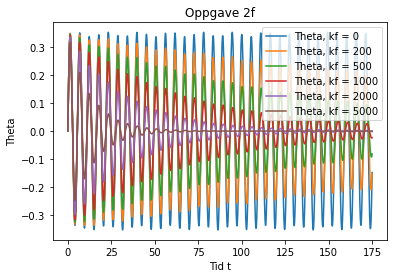

In [67]:
w_val0_kf = np.array([theta_0_kf, w0_kf_f, x_C0, y_C0, v_val_x, v_val_y])          #Lager initialbetingelser

t0 = 0
t_end = 175
t_kf = np.linspace(t0, t_end, int(t_end/h)+1)                                      #Lager tidsliste for plotting

plt.figure(20)
for k in kf:
    kF = k    #må definere kF som en global variabel for å fikse f
   
    t_arr_kf, w_val_kf = ODE_3(f_2f, masse_skip, y_C0, t0, t_end, w_val0_kf, 0.01, rk4, beta0, k)   #Henter verdier

    plt.plot(t_arr_kf, w_val_kf[:,0], label=f'Theta, kf = {k}')               #Plotter for hver kF i den samme figuren
    
plt.title("Oppgave 2f") 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()

Vi definerer initialverdiene våre samt en tidsakse for plotting. For hvert element i listen vår med ulike friksjonskoeffisienter skal vi hente ut bevegelsen til skipet sin utvikling. Vi plotter så vinkelutviklingen til skipet når den har ulik friksjonskraft som virker på skroget grunnet ulike friksjonskoeffisienter. Plottet viser oss tydelig at jo mer friksjonskraft, jo mer motstand og bremsing gir vannet for bevegelsen til skipet. Når vi ikke har friksjon er det ingenting som hindrer bevegelse, mens når friksjonskoeffisienten er stor vil friksjonen bremse skipet til det ender opp med å stå stille og helt loddrett i vannet.

### 2g)

In [68]:

#Startparametre oppgitt i 2g) ---------------------------------
k_f = 100                                                #[kg/s]  friksjonskoeffisient
F_0 = 0.625 * masse_skip * g                             #Maksverdi friksjonskraft
omega_0 = np.sqrt(masse_skip * g * cm_skip / Ic_skip)    #formel for omega
w0_kf = np.radians(2)                                    #Startomega

theta_0_kf = 0                                           #Startvinkel
Ww = 0.93 * omega_0                                      #friksjonsomega

#Funksjon med ny k_f og F_0 ----------------------------------------------

def f_2g(t, w_val):            #Denne er lik som tidligere men blir ikke forstyrret av gamle konstanter
    theta = w_val[0]
    omega = w_val[1]
    x = w_val[2]
    y = w_val[3]
    v_x = w_val[4]
    v_y = w_val[5]

    gamma = 2 * np.arccos(np.cos(beta0/2) - 4/(3*np.pi) * (1-np.cos(theta)) + (y - y_C0)/R_skip)
    A = 1/2 * R_skip**2 * (gamma-np.sin(gamma))
    
    f = np.array([omega, 
                (-A * g * vann_tetthet * cm_skip *np.sin(theta) 
                 - k_f * R_skip * gamma * omega * (y_C0 - (R_skip*np.cos(gamma/2)-1)) 
                + F_0 * np.cos(Ww*t) * y )/ Ic_skip,
                v_x, v_y, 
                (F_0*np.cos(Ww*t)- k_f*R_skip*gamma*omega)/masse_skip, -g + A*vann_tetthet*g/masse_skip], dtype='float')
    return f


Vi definerer startbetingelsene vi er gitt, spesielt at friksjonskoeffisienten skal være 100 kg/s og maksverdien til friksjonskraften skal være $F_0 = 0.625 m g$. Vi definerer en ny f-funksjon hvor den eneste forskjellen fra tidligere er at den henter inn de riktige verdiene $k_f$ og $F_0$ som ikke blir forstyrra fra tidligere konstanter.

<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


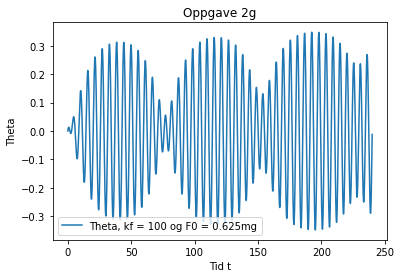

In [69]:
w_val0_g = np.array([theta_0_kf, w0_kf, 0, y_C0, 0, 0])          #Lager initialbetingelser

t_g, w_val_g = ODE_3(f_2g, masse_skip, y_C0, t0, 240, w_val0_g, 0.001, rk4, beta0, k_f)     #Henter verdier

plt.figure(21)
plt.plot(t_g, w_val_g[:,0], label=f'Theta, kf = {k_f} og F0 = 0.625mg')
plt.title("Oppgave 2g") 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()

Vi lager en array med initialverdiene og henter resultater fra differensialligningløseren. Når vi nå plotter utviklingen til $\theta$ ser vi en tydelig forskjell fra forrige plott. Når $F_0$ er noe annet enn 0 får vi svevning. 

Når vi har to frekvenser som ligger nære hverandre får man fenomenet svevning. Dette er en form for interferens hvor de to bølgene havner i en superposisjon. Ettersom frekvensene er så like vil summen av de to bølgene gi en slik bølge som vi kan se i plottet ovenfor. Dette skjer ettersom summen av de to bølgene vil enten føre til konstruktiv eller destruktiv interferens. 

Det som skjer med båten når det oppstår svevning er at båten vil begynne å oscillere raskt frem og tilbake, men med ulik intensitet. Intensiteten beskrives av modulasjonsbølgen, og den avhenger av hvorvidt vinden og bølgene er i fase eller ikke. 

### 2h)

Til nå har vi sett på Euler, som er en førsteordens metode for å løse differensiallikninger, samt Runge Kutta 4 som er en fjerdeordens metode. Vi ønsker å se på en tredje metode som har en annen orden enn både Euler og RK4. Heun er en andreordens metode som vi har kjennskap til og vi ønsker derfor å se nærmere på denne metoden og hvilken virkning den vil ha på systemet vårt med skipet. 

Heun kan generelt skrives som:
$$ k_{1} = f(t_i, y_i) \\ k_{2} = f(t_i + h, y_i + h \cdot k_{1} )$$

$$y_{i+1} = y_i + \frac{h}{2}(k_{1} + k_{2})$$

Dette er en andreordens metode, hvor metoden finner tangentene til løsningskurven ved begge endene av intervallet.

For å sjekke differansen til de ulike metodene ønsker vi nå å se på et nytt system med skipet. Vi ser nøyere på hvordan den harmoniske kraften kan gi effekt på skipet og muligheten for kantring. Vi studerer videre på systemet med at vi ikke har last, men vi regner med friksjon i vannet. Vi setter $k_{f}$ til $100 kg/s$ og lar $F_{0}$ fortsatt være $0.625 \cdot m \cdot g$. Vi lar friksjonsvinkelfrekvensen $\omega_w$ variere og studerer resultatene som følge av dette. Hva må $\omega_w$ være for å oppnå kantring av skipet selv når det virker friksjon mot skroget? Vår hypotese er at skipet vil kunne klare å kantre om det oppstår konstruktiv interferens, altså resonans, mellom vinkelfrekvensen til skipet samt vinkelfrekvensen til vannet. Det er også logisk om at jo større vi lar maksverdien til friksjonskraften $F_{0}$ være, jo større er sannsynligheten for kantring.


Ww_list = [omega_0*0.8, omega_0*0.93, omega_0*1, omega_0*1.1] 


<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


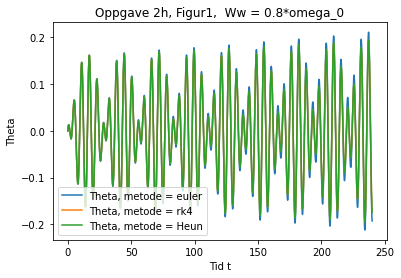

<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


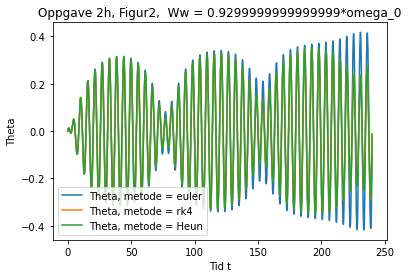

<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


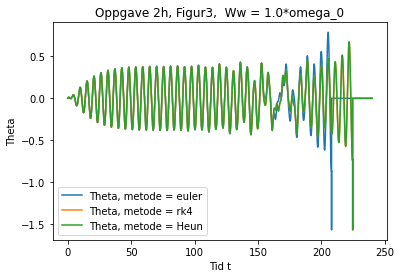

<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


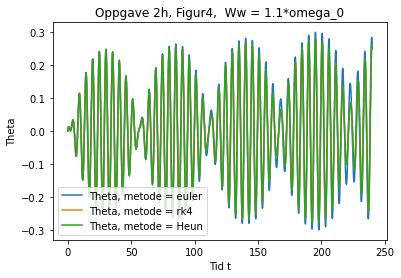

In [70]:
def Heun(f, t_val, w_val, h):                        #Annen metode for å løse differensiallikninger
    k1 = f(t_val, w_val)                             #Steg1
    k2 = f(t_val + h, w_val + h*k1)                  #Steg2

    w_next = w_val + h/2*(k1+k2)                     #Den neste verdien
    return w_next

w_val0_2h = np.array([theta_0_kf, w0_kf, x_C0, y_C0, v_val_x, v_val_y])          #Lager initialbetingelser

t0 = 0
t_end = 240
t_heun = np.linspace(t0, t_end, int(t_end/h)+1)                                  #Lager tidsliste for plotting

F_0 = 0.625*masse_skip*g
k = 100                                                                          #Friksjonskoeffisient
omega_0 = np.sqrt(masse_skip * g * cm_skip / Ic_skip)                            #Omega som Ww skal avhenge av

Ww_list = [omega_0*0.8, omega_0*0.93, omega_0*1, omega_0*1.1]                 #Liste med ulike Ww verdier for sammenligning
print("Ww_list = [omega_0*0.8, omega_0*0.93, omega_0*1, omega_0*1.1] ")  #Informerer

for i, Ww in enumerate(Ww_list):
    t_arr_rk4, w_val_rk4 = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, rk4, beta0, k)   #Henter verdier
    t_arr_heun, w_val_heun = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, Heun, beta0, k)   #Henter verdier
    t_arr_euler, w_val_euler = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, euler, beta0, k)   #Henter verdier
    
    plt.figure(22)
    plt.plot(t_heun, w_val_euler[:,0], label=f'Theta, metode = euler')      #Plotter euler sin thetautvikling
    plt.plot(t_heun, w_val_rk4[:,0], label=f'Theta, metode = rk4')          #Plotter rk4 sin thetautvikling
    plt.plot(t_heun, w_val_heun[:,0], label=f'Theta, metode = Heun')        #Plotter Heun sin thetautvikling
    
    plt.title(f'Oppgave 2h, Figur{i+1},  Ww = {Ww/omega_0}*omega_0') 
    plt.xlabel("Tid t")
    plt.ylabel("Theta")
    plt.legend()
    plt.show()



Ovenfor har vi plottet thetaverdiene over en tidsperiode med ulik vinkelfrekvens $\omega_w$. I figur 2 ser man tydelig at ved bruk av Eulers metode over lengre tid gir det større thetaverdier, noe som tyder på en divergerende utvikling. Dette er spesielt tydelig etter rundt 120 sekunder. Den divergerende utviklingen til Euler er også vist i Figur 3, hvor båten kantrer tidligere enn løsningene til Heun og RK4. Dette er igjen på grunn av Eulers metode overestimerer utviklingen av thetaverdiene slik at de øker raskere. Betingelsen for at skipet skal kantre er gitt ved $\theta > \frac{\pi -\gamma}{2}$, og når $\theta$-verdien øker raskere, vil dermed båten også kantre raskere. 

Båten kantrer også kun i Figur 3. Dette viser at når vinkelfrekvensen $\omega_w$ er like stor som vinkelfrekvensen til båten, så kantrer skipet. Dette skjer grunnet at det oppstår resonans når vinkelfrekvensene er like, og dermed vil båten begynne å oscillere med maksimal amplitude slik at den kantrer. 

I figur 4 er vinkelfrekvensen til den harmoniske kraften litt større enn vinkelfrekvensen til båtens svingninger, og vi ser at vi ikke har resonans lengre, men svevning. Dette gir mening ettersom vi da har to vinkelfrekvenser som akkurat ikke er like. 

Det vi altså observerer her er at dersom vinkelfrekvensen til den harmoniske kraften nærmer seg båtens egen vinkelfrekvens, så vil vi oppnå svevning. Dersom de to vinkelfrekvensene blir like vil det oppstå resonans, og svingningene vil oppnå maksimal amplitude slik at båten kantrer. 



<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


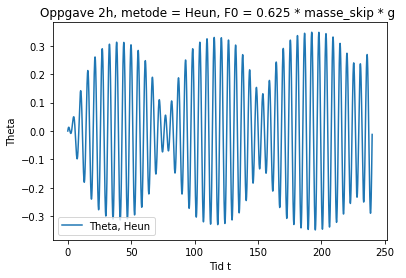

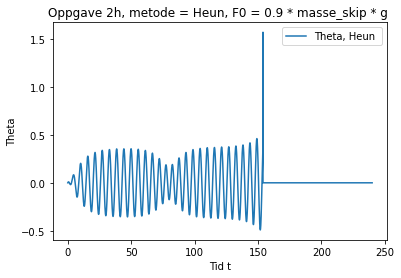

In [71]:
F_0 = 0.9 * masse_skip * g      #Ny F0
Ww = omega_0*0.93               #Original fra 2g for å ha lik verdi til resultatene

t_arr_heun1, w_val_heun1 = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, Heun, beta0, k)   #Henter verdier

F_0 = 0.625*masse_skip*g        #Original F0 fra 2g for sammenligning
t_arr_heun2, w_val_heun2 = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, Heun, beta0, k)   #Henter verdier


plt.figure(23)
plt.plot(t_arr_heun2, w_val_heun2[:,0], label=f'Theta, Heun')   
plt.title(f'Oppgave 2h, metode = Heun, F0 = 0.625 * masse_skip * g ') 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()

plt.figure(24)
plt.plot(t_arr_heun1, w_val_heun1[:,0], label=f'Theta, Heun ')  
plt.title(f'Oppgave 2h, metode = Heun, F0 = 0.9 * masse_skip * g ') 
plt.xlabel("Tid t")
plt.ylabel("Theta")
plt.legend()
plt.show()


Istedenfor å variere vinkelfrekvensen $\omega_w $ser vi nå på to ulike amplituder for harmonisk kraft $F_0$. Ved å øke $F_0$ ser man skipet ender opp med å kantre. Dette gir logisk mening, at ved stor nok horisontal kraft fra vind og bølger, så vil båten kantre. 

Den harmoniske kraften er gitt ved $F_w(t) = F_0 \cos(\omega_wt)$, som viser hvordan vinkelfrekvensen $\omega_w$ og amplituden $F_0$ henger sammen. Dermed tyder det på at ved å endre på $\omega_w$ og $F_0$, påvirker det sannsynligheten for at skipet kantrer. Altså, ved høyere $F_0$, og ved $\omega_w$-verdier som gir resonans, øker sannsynligheten for kantring.

<ipython-input-66-881476dfd8f9>:23: RuntimeWarning: invalid value encountered in arccos
  gamma = 2*np.arccos(np.cos(beta/2) - 4/(3*np.pi)*(1-np.cos(wn[0]))+(wn[2] - yC)/R_skip)      #Gamma


Utregningene og plottene inneholder at: F0=481547.24893306056N og kf=100kg/s
Plotter for hele tidsaksen


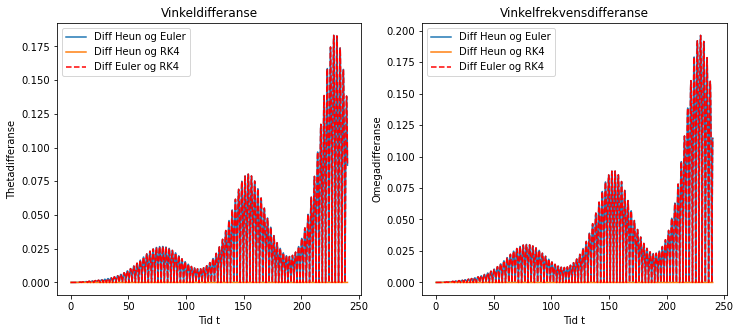

Plotter frem til t=100s for å se tydeligere


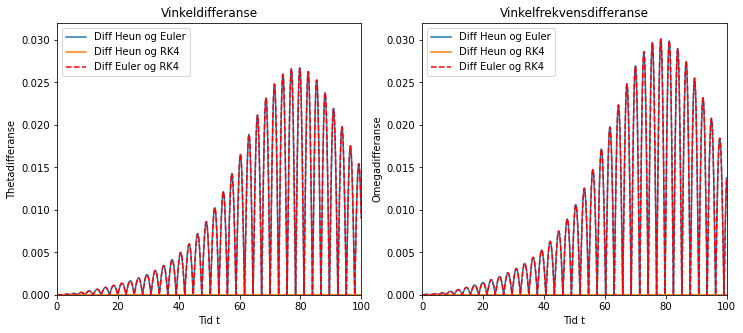

Plotter frem til t=18s for for å se enda tydeligere


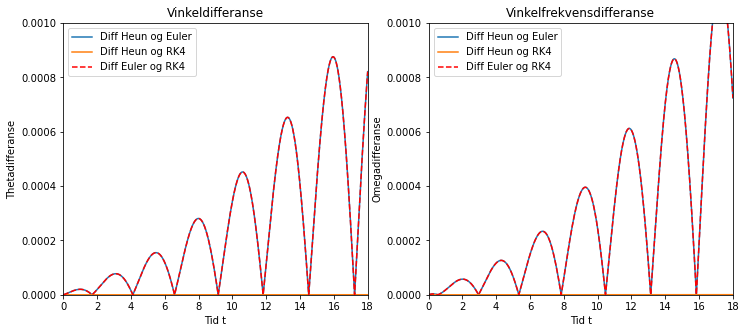

Plotter for hele tidsaksen


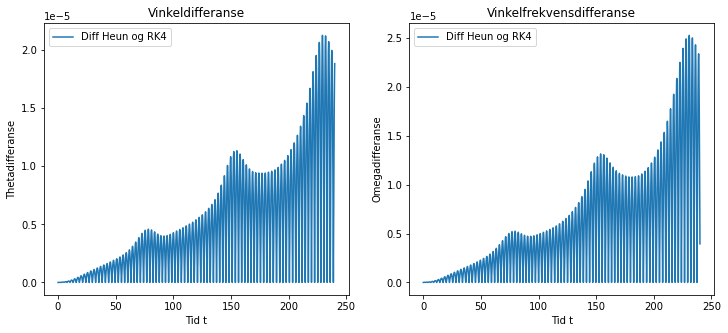

In [72]:

Ww = omega_0*0.93               
F_0 = 0.625*masse_skip*g

t_arr_rk4, w_val_rk4 = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, rk4, beta0, k)   #Henter verdier
t_arr_heun, w_val_heun = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, Heun, beta0, k)   #Henter verdier
t_arr_euler, w_val_euler = ODE_3(f_2g, masse_skip, y_C0, t0, t_end, w_val0_2h, 0.001, euler, beta0, k)   #Henter verdier

#Heun, Euler og Rk4 i forhold til hverandre---------------------------------------------------------------

diffThetaHeunEuler = abs(w_val_heun[:,0] - w_val_euler[:,0])
diffThetaHeunRK4 = abs(w_val_heun[:,0] - w_val_rk4[:,0])
diffThetaEulerRK4 = abs(w_val_euler[:,0] - w_val_rk4[:,0])

diffOmegaHeunEuler = abs(w_val_heun[:,1] - w_val_euler[:,1])
diffOmegaHeunRK4 = abs(w_val_heun[:,1] - w_val_rk4[:,1])
diffOmegaEulerRK4 = abs(w_val_euler[:,1] - w_val_rk4[:,1])

print(f'Utregningene og plottene inneholder at: F0={F_0}N og kf={k}kg/s')

print("Plotter for hele tidsaksen")
fig_2f1, (fig15, fig16) = plt.subplots(1,2, figsize=(12,5))

fig15.plot(t_arr_heun, diffThetaHeunEuler, label="Diff Heun og Euler")
fig15.plot(t_arr_heun, diffThetaHeunRK4, label="Diff Heun og RK4")
fig15.plot(t_arr_heun, diffThetaEulerRK4,'r--', label="Diff Euler og RK4")
fig15.set_title(f'Vinkeldifferanse')
fig15.set_xlabel("Tid t")
fig15.set_ylabel("Thetadifferanse")                                   
fig15.legend()

fig16.plot(t_arr_heun, diffOmegaHeunEuler, label="Diff Heun og Euler")
fig16.plot(t_arr_heun, diffOmegaHeunRK4, label="Diff Heun og RK4")
fig16.plot(t_arr_heun, diffOmegaEulerRK4,'r--', label="Diff Euler og RK4")
fig16.set_title(f'Vinkelfrekvensdifferanse')
fig16.set_xlabel("Tid t")
fig16.set_ylabel("Omegadifferanse")
fig16.legend()

plt.show()

print("Plotter frem til t=100s for å se tydeligere")
fig_2f2, (fig17, fig18) = plt.subplots(1,2, figsize=(12,5))

fig17.plot(t_arr_heun, diffThetaHeunEuler, label="Diff Heun og Euler")
fig17.plot(t_arr_heun, diffThetaHeunRK4, label="Diff Heun og RK4")
fig17.plot(t_arr_heun, diffThetaEulerRK4,'r--', label="Diff Euler og RK4")
fig17.set_title(f'Vinkeldifferanse')
fig17.set_xlabel("Tid t")
fig17.set_ylabel("Thetadifferanse")  
fig17.set_xlim([0,100])
fig17.set_ylim([0,0.032])
fig17.legend()

fig18.plot(t_arr_heun, diffOmegaHeunEuler, label="Diff Heun og Euler")
fig18.plot(t_arr_heun, diffOmegaHeunRK4, label="Diff Heun og RK4")
fig18.plot(t_arr_heun, diffOmegaEulerRK4,'r--', label="Diff Euler og RK4")
fig18.set_title(f'Vinkelfrekvensdifferanse')
fig18.set_xlabel("Tid t")
fig18.set_ylabel("Omegadifferanse")
fig18.set_xlim([0,100])
fig18.set_ylim([0,0.032])
fig18.legend()

plt.show()

print("Plotter frem til t=18s for for å se enda tydeligere")
fig_2f3, (fig17, fig18) = plt.subplots(1,2, figsize=(12,5))

fig17.plot(t_arr_heun, diffThetaHeunEuler, label="Diff Heun og Euler")
fig17.plot(t_arr_heun, diffThetaHeunRK4, label="Diff Heun og RK4")
fig17.plot(t_arr_heun, diffThetaEulerRK4,'r--', label="Diff Euler og RK4")
fig17.set_title(f'Vinkeldifferanse')
fig17.set_xlabel("Tid t")
fig17.set_ylabel("Thetadifferanse")  
fig17.set_xlim([0,18])
fig17.set_ylim([0,0.001])
fig17.legend()

fig18.plot(t_arr_heun, diffOmegaHeunEuler, label="Diff Heun og Euler")
fig18.plot(t_arr_heun, diffOmegaHeunRK4, label="Diff Heun og RK4")
fig18.plot(t_arr_heun, diffOmegaEulerRK4,'r--', label="Diff Euler og RK4")
fig18.set_title(f'Vinkelfrekvensdifferanse')
fig18.set_xlabel("Tid t")
fig18.set_ylabel("Omegadifferanse")
fig18.set_xlim([0,18])
fig18.set_ylim([0,0.001])
fig18.legend()

plt.show()

print("Plotter for hele tidsaksen")
fig_2f1, (fig15, fig16) = plt.subplots(1,2, figsize=(12,5))

#fig15.plot(t_arr_heun, diffThetaHeunEuler, label="Diff Heun og Euler")
fig15.plot(t_arr_heun, diffThetaHeunRK4, label="Diff Heun og RK4")
#fig15.plot(t_arr_heun, diffThetaEulerRK4,'r--', label="Diff Euler og RK4")
fig15.set_title(f'Vinkeldifferanse')
fig15.set_xlabel("Tid t")
fig15.set_ylabel("Thetadifferanse")                                   
fig15.legend()

#fig16.plot(t_arr_heun, diffOmegaHeunEuler, label="Diff Heun og Euler")
fig16.plot(t_arr_heun, diffOmegaHeunRK4, label="Diff Heun og RK4")
#fig16.plot(t_arr_heun, diffOmegaEulerRK4,'r--', label="Diff Euler og RK4")
fig16.set_title(f'Vinkelfrekvensdifferanse')
fig16.set_xlabel("Tid t")
fig16.set_ylabel("Omegadifferanse")
fig16.legend()

plt.show()


In [41]:
print("Differansen i de siste theta-verdiene mellom Heun og RK4: ",w_val_heun[-1][0]-w_val_rk4[-1][0])
print("Differansen i de siste theta-verdiene mellom Heun og Euler: ",w_val_heun[-1][0]-w_val_euler[-1][0])
print("Differansen i de siste theta-verdiene mellom RK4 og Euler: ",w_val_rk4[-1][0]-w_val_euler[-1][0])

Differansen i de siste theta-verdiene mellom Heun og RK4:  1.882630358596496e-05
Differansen i de siste theta-verdiene mellom Heun og Euler:  0.08694922117377746
Differansen i de siste theta-verdiene mellom RK4 og Euler:  0.0869303948701915


Det er store forskjeller i bruken av Euler, Heun og RK4 metodene. I denne oppgaven gjelder dette spesielt mellom Euler, og Heun og RK4. Det er heller ikke nødvendigvis at høyere ordens metoder resulterer i mye bedre resultater da dette avhenger av initialbetingelser og differensialligningen man skal løse. 

Fra figurene ser man ingen synlig forskjell i differansen mellom Euler og Heun, og differansen mellom Euler og RK4. Det er likevel en liten forskjell i verdiene. Som vist over viser det hvor like de beregnede verdiene til Heun og RK4 er, hvor det er en differanse av størrelsesorden $10^{-5}$, som er veldig mye mindre enn differansen mot Euler, som er av størrelsesorden $10^{-2}$. Ettersom Euler sin differanse er mye større enn Heun og RK4 sin, vil skaleringen av figuren gjøre at differansen mellom Heun og RK4 blir lite synlig.

En av grunnene til at Eulers metode er mindre nøyaktig enn Heun og RK4 er fordi Euler er kun av første orden, $y_{n+1} = y_n + hf'(t_n, y_n)$. Det medfører til at nøyaktigheten av resultatene forbedrer seg lineært med minskingen av steglengden h. Det betyr at Euler må ha ekstremt små steglengder for at resultatene skal være riktige, noe som ble vist fram i oppgave 1d. Der ser man hvordan thetaverdien begynte å øke over tid ved valg av for stor steglengde. Denne feilen er også merkbar i figuren vår med svevning, hvor løst med Eulers metode viser at thetaverdien øker over tid som resulterer i ingen svevning etter rundt 220 sekunder. Dette viser at thetaverdiene divergerer over tid.

Dette problemet forsvinner allerede ved bruk av en andre ordens metode, altså Heuns metode. I Heuns metode taes det hensyn til 'kurvaturen' til funksjonen, som vil si den dobbeltderiverte. Det gjør at resultatene ikke varierer lineært med steglengden.

Ettersom vår differensialligning er en andreordens differensialligning, vil det ikke være nødvendig å ha en mye høyere ordens numerisk metode som RK4 for å oppnå tilnærme like gode resultater. Men det er tydelig at Eulers metode, som er førsteordens, er ikke egnet for å løse dette problemet.


### Konklusjon 


Vi lagde oss en modell av et skip for å simulere og studere utviklingen når den settes til sjøs. Når skipet står i ro i sjøen uten last blir vinkel $\beta$, 2.31 rad, altså 132.34 grader. Massesenteret til skipet er da 0.2 meter under vannoverflaten. Da vi ga skipet en startvinkel eller en startvinkelfrekvens ulik 0 begynte skipet å svinge frem og tilbake som en harmonisk oscillator. Vi løste bevegelseslikningene med stor nøyaktighet, med både Eulers metode og Runge-Kutta 4. Runge-Kutta 4 ga best resultater slik at vi fortsatte med denne metoden.

Vi lot så sektorvinkelen $\gamma$ endre seg når $\theta$ gjorde det slik at mengden fortrengt vann varierte. Da endret posisjonen til massesenteret til skipet seg periodisk, men med varierende amplituder. Da vi lot skipet kantre om kanten av skipet havnet under vann så kantret skipet når $\theta_0$ var 0 rad og $\omega$ var 0.4317 rad/s. Videre lot vi skipet ha bevegelig last på dekk som vi fulgte med på posisjonen til samt om skipet kantret. Begge lastene falt av dekket, men kun den tyngste lasten fikk skipet til å kantre grunnet stort dreiemoment. Da vi satte på gjerder på dekk slik at lasten ikke hadde mulighet til å falle av så vi at den letteste lasten klarte å få ny startfart begynte å bevege seg frem og tilbake på dekk mellom gjerdene. Den tyngste lasten  ble stående fast på kanten slik at skipet fikk stor vektdifferanse på dekk og kantret.

Til slutt så vi på effekten av friksjonskraft på skroget til skipet. Jo større friksjonskoeffisient jo mer motstand er det i vannet slik at skipet stabiliseres. Friksjonskraften motstår skipets svingebevegelse og gir mindre sannsynlighet for kantring. 

I tillegg ble det undersøkt hvordan en harmonisk kraft fra vind og bølger ville påvirke skipets svingning. Det viste seg at en form for interferens, svevning, oppsto under slike forhold. Dette fordi vinkelfrekvensen til vinden og bølgene er svært lik vinkelfrekvensen til båtens svingninger. Dermed begynner båten å oscillere raskt frem og tilbake med en intensitet som avhenger av hvorvidt bølgene og vinden er i fase eller motfase.

Vi implementerte til slutt en ny metode for å løse bevegelsesligningene våre, Heuns metode, en andreordens metode. Den viste seg å være tilnærmet like nøyaktig som Runge-Kutta 4, selv med 2 færre ordener. Vi brukte Heuns metode til å finne resultater av ulike vinkelfrekvensers effekt på skipet og der kantret skipet om vi fikk resonans mellom denne $\omega_w$ og skipet sin $\omega$.

Etter å ha studert hvordan dynamikken og stabilitetsegenskapene har blitt påvirket av ulike faktorer kan vi helt tilslutt konkludere med at de ulike faktorene påvirker skipet i ulik grad, og kan ha ført til at Vasaskipet kantret.

## Kilder

https://wiki.math.ntnu.no/_media/tma4320/2022v/tekfysprosjekt_vitber_2022.pdf  Hentet 28.02.22, kl. 11:31
https://www.math.ntnu.no/emner/TMA4320/2022v/pdf/ODE.pdf Hentet 10.03.22, kl. 14:29 
